<a href="https://colab.research.google.com/github/lanreayk/Data-Analytics_ML_portfolio/blob/main/dwa_proj_cohort_16_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats import mstats
import keras
from keras.models import Sequential
from keras.layers import*
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#loading google drive to access the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#add file location/path
path = '/content/drive/MyDrive/Colab Notebooks/Muskets-teamData-V2.csv'

In [4]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(path)
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,49,CB,13-Jul-18,NaN,€100K,€1K,€70K,145.0,23.0,26.0,43.0,26.0,27.0,142.0,27,23.0,21.0,29.0,42.0,294.0,68.0,60.0,69.0,46.0,51.0,221.0,36.0,57.0,54.0,50.0,24.0,192.0,48,50.0,28

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  object 
 13  Weight            19020 non-null  object 
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

In [6]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

Sub Tasks
1. Extract the player names from the PlayerUrl column and create a new column name Player
Name from the extracts
2. Create a new column titled Player Status from the CONTRACT column with 3 labels ;
a. 'Active' If the player has an active contract
b. 'Free', if the player is free
c. 'On Loan' if the player is on loan
3. Unpack the POSITIONS column into as many columns as there are positions and assign Boolean
values in the columns for each player as appropriate. Name the columns the play position
4. Weight and Height, W/F, SM and IR Columns: convert to integers
5. Value, Wage and Release Clause columns: convert to Float
6. Inspect the HITS column and ensure its float
7. Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into
which you convert the respective values into clusters/labels as follows
a. Height: Bucket intervals of 10 years
b. Weight: Bucket intervals of 10 kg
c. Wage: bucket intervals of 50K
d. Value: bucket intervals of 50M
e. Release Clause: bucket intervals of 50M

TASK 1
1. Extract the player names from the PlayerUrl column and create a new column name Player
Name from the extracts

In [7]:
df.playerUrl.values[5900]

'http://sofifa.com/player/204677/oriol-rosell-argerich/210006/'

In [8]:
df.playerUrl.values[5900].split('/')[-3]

'oriol-rosell-argerich'

In [9]:
playerList = []

for item in df.playerUrl.values:
    player = item.split('/')[-3]
    player = player.replace('-', ' ')
    playerList.append(player)


In [10]:
playerList

['lionel messi',
 'c ronaldo dos santos aveiro',
 'jan oblak',
 'kevin de bruyne',
 'neymar da silva santos jr',
 'robert lewandowski',
 'mohamed salah',
 'alisson ramses becker',
 'kylian mbappe',
 'marc andre ter stegen',
 'virgil van dijk',
 'sadio mane',
 'carlos henrique venancio casimiro',
 'thibaut courtois',
 'manuel neuer',
 'karim benzema',
 'sergio ramos garcia',
 'sergio aguero',
 'raheem sterling',
 'ngolo kante',
 'joshua kimmich',
 'paulo dybala',
 'ederson santana de moraes',
 'harry kane',
 'samir handanovic',
 'kalidou koulibaly',
 'eden hazard',
 'toni kroos',
 'antoine griezmann',
 'jadon sancho',
 'trent alexander arnold',
 'bernardo mota carvalho e silva',
 'andrew robertson',
 'aymeric laporte',
 'bruno miguel borges fernandes',
 'fabio henrique tavares',
 'heung min son',
 'roberto firmino barbosa de oliveira',
 'keylor navas',
 'giorgio chiellini',
 'sergio busquets burgos',
 'pierre emerick aubameyang',
 'wojciech szczesny',
 'angel di maria',
 'luka modric',


In [11]:
df['playerName'] = playerList

In [12]:
#Check for mull values in the Contract column
df['Contract'].isna().sum()

0

#TASK 2:
   Create a new column titled Player Status from the CONTRACT column with 3 labels ;
a. 'Active' If the player has an active contract
b. 'Free', if the player is free
c. 'On Loan' if the player is on loan

In [13]:
df.Contract.unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [14]:
# function to classify contract values under: Free, Active and On loan

contList = []

for item in df.Contract.values:
    if 'Free' in item:
        contList.append('Free')
    elif 'On Loan' in item:
        contList.append('On Loan')
    else:
        contList.append('Active')


In [15]:
contList

['Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',

In [16]:
df['playerStatus'] = contList

In [17]:
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,playerName,playerStatus
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi,Active
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro,Active
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,jan oblak,Active
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,kevin de bruyne,Active
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,neymar da silva santos jr,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,49,CB,13-Jul-

TASK 3:
    3. Unpack the POSITIONS column into as many columns as there are positions and assign Boolean
values in the columns for each player as appropriate. Name the columns the play position


In [18]:
#Check the positions
df.Positions

0        RW, ST, CF
1            ST, LW
2                GK
3           CAM, CM
4           LW, CAM
            ...    
19016            CB
19017            CM
19018            CM
19019            RW
19020        CB, LB
Name: Positions, Length: 19021, dtype: object

In [19]:
df.Positions.unique()

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM', 'ST', 'RW',
       'ST, LW, RW', 'CB', 'LW', 'CDM', 'CF, ST', 'LW, RW', 'CDM, CM',
       'CDM, RB', 'CF, CAM', 'LW, ST', 'CM', 'ST, CF, LW', 'RM, LM, CAM',
       'RB', 'RW, CAM, CM', 'LB', 'LM, CF', 'CF', 'RW, LW', 'CAM, RM, RW',
       'CM, CDM', 'CAM, CF, ST', 'CM, CDM, CAM', 'CF, LW, CAM',
       'CAM, RM, CF', 'LM, ST', 'RM, LM, RW', 'LM', 'CAM, RW', 'CB, CDM',
       'RW, RM', 'LW, CF', 'CM, RM, LM', 'LB, LM', 'CAM, CM, RM',
       'CAM, CM, CF', 'CAM, CF', 'LM, RM, LW', 'LM, LB, CM', 'CM, LM, LB',
       'RM, RW', 'RM, CM', 'CAM, CM, LW', 'CB, LB', 'RM, RB', 'ST, RW',
       'LM, RW, LW', 'RB, LB', 'RB, RM', 'RM', 'LM, RM, CF', 'CAM, RM',
       'RB, RWB', 'CDM, CB, CM', 'CAM, RM, ST', 'LM, LW, RM', 'CM, CAM',
       'ST, RM, CF', 'LM, RM', 'RM, CF', 'LM, LWB', 'RW, RM, CF',
       'RB, CM', 'LW, CAM, RW', 'CAM, LW, CM', 'CM, CAM, CDM',
       'RW, LW, CAM', 'CM, CAM, LM', 'CM, RM, ST', 'CDM, CM, RB',
       'ST, CAM', 

In [20]:
#function to split and list all posible positions
posList = []

for val in df.Positions:
    if ',' in val: # if comma exists in string it means player plays multiple positions
        pList = val.split(',')
        playPos = [x.strip() for x in pList]
        posList.extend(playPos)

    else:
        val.strip()
        posList.append(val)


In [21]:
pos = list(set(posList))
pos

['CDM',
 'CM',
 'LB',
 'ST',
 'CF',
 'CB',
 'RB',
 'LW',
 'RM',
 'GK',
 'LWB',
 'CAM',
 'LM',
 'RWB',
 'RW']

In [22]:
# function to create a new column for each player positions
playerPos = []

for positions in df.Positions.values:
    posTable = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for p in pos:
        if p in positions:
            Pidx = pos.index(p)
            posTable[Pidx] = 1
    playerPos.append(posTable)



In [23]:
playerPos

[[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [24]:
dfPos = pd.DataFrame(playerPos, columns = pos) # converting the postions list to a dataframe
dfPos

,CDM,CM,LB,ST,CF,CB,RB,LW,RM,GK,LWB,CAM,LM,RWB,RW
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
19017,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
#check to see the function does what is expected
df.Positions.values[0:5]

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM'], dtype=object)

In [26]:
# merging the play positions table with the original dataframe
dfNew = df.join(dfPos)
dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,playerName,playerStatus,CDM,CM,LB,ST,CF,CB,RB,LW,RM,GK,LWB,CAM,LM,RWB,RW
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi,Active,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro,Active,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,jan oblak,Active,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,kevin de bruyne,Active,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,neymar da silva santos jr,Active,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [27]:
# Check to see if the new columns have been added
dfNew.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

#TASK 4:
 #   Weight and Height, W/F, SM and IR Columns: convert to integers

In [28]:
# Check the 'W/F' column
df['W/F']

0        4 ★
1        4 ★
2        3 ★
3        5 ★
4        5 ★
        ... 
19016    2 ★
19017    2 ★
19018    2 ★
19019    3 ★
19020    3 ★
Name: W/F, Length: 19021, dtype: object

In [29]:
# Function to remove ★ from the columns
starList = []
for x1, x2, x3 in zip(df['W/F'].values, df['SM'].values, df['IR'].values):

    starList.append([x1[0],x2[0],x3[0]])
pd.DataFrame(starList, columns=['W/F', 'SM', 'IR'])

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
19016,2,2,1
19017,2,2,1
19018,2,2,1
19019,3,2,1


In [30]:
# Add the corrected set of columns
starDF = pd.DataFrame(starList, columns=['W/F1', 'SM1', 'IR1'])
# Convert columns to floating-point data type
starDF['W/F1'] = starDF['W/F1'].astype(float)
starDF['SM1'] = starDF['SM1'].astype(float)
starDF['IR1'] = starDF['IR1'].astype(float)
dfNew = dfNew.join(starDF)
dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,playerName,playerStatus,CDM,CM,LB,ST,CF,CB,RB,LW,RM,GK,LWB,CAM,LM,RWB,RW,W/F1,SM1,IR1
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi,Active,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,4.0,4.0,5.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro,Active,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4.0,5.0,5.0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,jan oblak,Active,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1.0,3.0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,kevin de bruyne,Active,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5.0,4.0,4.0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,neymar da silva santos jr,Active,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [31]:
# preprocess the Weight and Height by converting to uniform scale of Kg and remove null values

In [32]:
# Check the variants in the data column
df.Weight.unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       nan, '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs',
       '185lbs', '170lbs', '203lbs', '168lbs', '161lbs', '146lbs',
       '130lbs', '190lbs', '174lbs', '148lbs', '165lbs', '159lbs',
       '192lbs', '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg',
       '103kg', '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg',
       '107kg', '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [33]:
# Function to unify the scale to Kg
wList = [] # Keeping 'kg' as our unit

for val in df.Weight.values:
    val = str(val)
    if 'kg' in val:
        #print(val)
        #print(val[:-2])
        wList.append(float(val[:-2]))
    elif 'lbs'in val:
        wList.append(float(val[:-3])*0.453592) # converting lbs to kg
    else:
        wList.append(val)

In [34]:
wList

[72.0,
 83.0,
 87.0,
 70.0,
 68.0,
 80.0,
 71.0,
 91.0,
 73.0,
 85.0,
 92.0,
 69.0,
 84.0,
 96.0,
 92.0,
 81.0,
 82.0,
 70.0,
 69.0,
 70.0,
 73.0,
 75.0,
 86.0,
 89.0,
 92.0,
 89.0,
 74.0,
 76.0,
 73.0,
 76.0,
 69.0,
 64.0,
 64.0,
 85.0,
 69.0,
 78.0,
 78.0,
 76.0,
 80.0,
 85.0,
 76.0,
 80.0,
 90.0,
 69.0,
 66.0,
 83.0,
 82.0,
 85.0,
 75.0,
 82.0,
 73.0,
 81.0,
 60.0,
 84.0,
 74.0,
 85.0,
 94.0,
 79.0,
 67.0,
 68.0,
 68.0,
 80.0,
 82.0,
 76.0,
 78.0,
 83.0,
 89.0,
 80.0,
 70.0,
 90.0,
 75.0,
 75.0,
 65.0,
 81.0,
 75.0,
 67.0,
 70.0,
 76.0,
 74.0,
 75.0,
 74.0,
 59.0,
 81.0,
 79.0,
 75.0,
 82.0,
 94.0,
 80.0,
 70.0,
 70.0,
 76.0,
 86.0,
 85.0,
 61.0,
 74.0,
 78.0,
 69.0,
 72.0,
 71.0,
 74.0,
 79.0,
 93.0,
 83.0,
 79.0,
 81.0,
 88.0,
 71.0,
 75.0,
 69.0,
 73.0,
 97.0,
 71.0,
 76.0,
 84.0,
 76.0,
 75.0,
 77.0,
 68.0,
 65.0,
 81.0,
 68.0,
 74.0,
 85.0,
 79.0,
 73.0,
 72.0,
 79.0,
 78.0,
 66.0,
 62.0,
 67.0,
 70.0,
 78.0,
 67.0,
 78.0,
 77.0,
 80.0,
 89.0,
 81.0,
 84.0,
 77.0,
 60.0,
 73.0,

In [35]:
# add column "wt_kg" to the main data frame
dfNew['wt_kg'] = wList

In [36]:
dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,playerName,playerStatus,CDM,CM,LB,ST,CF,CB,RB,LW,RM,GK,LWB,CAM,LM,RWB,RW,W/F1,SM1,IR1,wt_kg
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi,Active,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,4.0,4.0,5.0,72.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro,Active,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4.0,5.0,5.0,83.0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,jan oblak,Active,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1.0,3.0,87.0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,kevin de bruyne,Active,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5.0,4.0,4.0,70.0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,neymar da silva santos jr,Active,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5.0,5.0,5.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [37]:
#check Heights values and unify the scale too.. convert to cm
df.Height.unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [38]:
#Function to exxtract the values in fit

tempList = []

for val in df.Height:
    if 'cm' not in val:
        tempList.append(val)

xx = list(set(tempList))
print(xx)

['5\'4"', '5\'6"', '5\'11"', '6\'3"', '6\'1"', '5\'10"', '6\'0"', '6\'4"', '5\'7"', '5\'9"', '6\'2"', '6\'5"']


In [39]:
# Function to convert the height readings to cm
hgtList = []

for val in df.Height.values:
    val = str(val)
    if 'cm' in val:
        ht = float(val[:-2])
        hgtList.append(ht)
    elif val in xx:
        ft = val[0]
        inch = val[-2]
        # converting to cm
        hgt1 = float(ft)*30.48 + float(inch)*2.54
        hgtList.append(hgt1)
    else:
        hgtList.append(val)


In [40]:
hgtList

[170.0,
 187.0,
 188.0,
 181.0,
 175.0,
 184.0,
 175.0,
 191.0,
 178.0,
 187.0,
 193.0,
 175.0,
 185.0,
 199.0,
 193.0,
 185.0,
 184.0,
 173.0,
 170.0,
 168.0,
 176.0,
 177.0,
 188.0,
 188.0,
 193.0,
 187.0,
 175.0,
 183.0,
 176.0,
 180.0,
 180.0,
 173.0,
 178.0,
 189.0,
 179.0,
 188.0,
 183.0,
 181.0,
 185.0,
 187.0,
 189.0,
 187.0,
 195.0,
 180.0,
 172.0,
 182.0,
 188.0,
 185.0,
 186.0,
 192.0,
 173.0,
 191.0,
 165.0,
 191.0,
 179.0,
 194.0,
 191.0,
 183.0,
 173.0,
 167.0,
 170.0,
 182.0,
 191.0,
 191.0,
 176.0,
 188.0,
 189.0,
 188.0,
 186.0,
 196.0,
 175.0,
 184.0,
 181.0,
 186.0,
 183.0,
 179.0,
 175.0,
 180.0,
 182.0,
 181.0,
 180.0,
 163.0,
 186.0,
 183.0,
 176.0,
 190.0,
 191.0,
 180.0,
 174.0,
 183.0,
 181.0,
 191.0,
 190.0,
 169.0,
 183.0,
 187.0,
 175.0,
 178.0,
 180.0,
 183.0,
 185.0,
 190.0,
 185.0,
 181.0,
 174.0,
 194.0,
 181.0,
 179.0,
 171.0,
 171.0,
 195.0,
 170.0,
 184.0,
 190.0,
 189.0,
 184.0,
 185.0,
 170.0,
 172.0,
 188.0,
 181.0,
 178.0,
 187.0,
 190.0,
 178.0,


TASK 5
# Value, Wage and Release Clause columns: convert to Float

In [41]:
df.Value.unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [42]:
# Function to convert Values column to numbers and remove pound symbol
valList = [] # thousands

for val in df.Value:
    if 'K' in val:
        val = float(val[1:-1])*1000
        valList.append(val)
    elif 'M' in val:
        val = float(val[1:-1])*1000000
        valList.append(val)
    else:
        valList.append(float(0))

In [43]:
valList

[103500000.0,
 63000000.0,
 120000000.0,
 129000000.0,
 132000000.0,
 111000000.0,
 120500000.0,
 102000000.0,
 185500000.0,
 110000000.0,
 113000000.0,
 120500000.0,
 90500000.0,
 82000000.0,
 17500000.0,
 83500000.0,
 33500000.0,
 83500000.0,
 114500000.0,
 78000000.0,
 103000000.0,
 109000000.0,
 92000000.0,
 109000000.0,
 10000000.0,
 76500000.0,
 89500000.0,
 87500000.0,
 79500000.0,
 124000000.0,
 114000000.0,
 95000000.0,
 90500000.0,
 92500000.0,
 105500000.0,
 88500000.0,
 85000000.0,
 81500000.0,
 26000000.0,
 21000000.0,
 56000000.0,
 67500000.0,
 53000000.0,
 63000000.0,
 36500000.0,
 51000000.0,
 26000000.0,
 78000000.0,
 65500000.0,
 46500000.0,
 61500000.0,
 72500000.0,
 77500000.0,
 77500000.0,
 43500000.0,
 32500000.0,
 46500000.0,
 36000000.0,
 32000000.0,
 54000000.0,
 49500000.0,
 57000000.0,
 66500000.0,
 74500000.0,
 71500000.0,
 121000000.0,
 99000000.0,
 67000000.0,
 86500000.0,
 93500000.0,
 70000000.0,
 81500000.0,
 62000000.0,
 67000000.0,
 66000000.0,
 53000

In [44]:
len(valList)

19021

In [45]:
# check for validity of new column obtained
len(dfNew.Value)

19021

In [46]:
# Add the new column to dfNew
dfNew['valueNew']=valList

In [47]:
df.Wage.unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

In [48]:
# Function to convert wage column to numbers and reomve pounds symbol
wageList = []

for w in df.Wage:
    if 'K' in w:
        w = w[1:-1]
        wageList.append(float(w)*1000)
    else:
        w = w[1:]
        wageList.append(float(w)*1000)

In [49]:
wageList

[560000.0,
 220000.0,
 125000.0,
 370000.0,
 270000.0,
 240000.0,
 250000.0,
 160000.0,
 160000.0,
 260000.0,
 210000.0,
 250000.0,
 310000.0,
 250000.0,
 130000.0,
 350000.0,
 300000.0,
 300000.0,
 270000.0,
 190000.0,
 145000.0,
 190000.0,
 195000.0,
 220000.0,
 100000.0,
 140000.0,
 350000.0,
 310000.0,
 290000.0,
 82000.0,
 110000.0,
 230000.0,
 155000.0,
 200000.0,
 195000.0,
 155000.0,
 165000.0,
 190000.0,
 110000.0,
 95000.0,
 240000.0,
 170000.0,
 105000.0,
 160000.0,
 260000.0,
 115000.0,
 125000.0,
 125000.0,
 130000.0,
 150000.0,
 230000.0,
 220000.0,
 135000.0,
 190000.0,
 160000.0,
 220000.0,
 95000.0,
 55000.0,
 58000.0,
 100000.0,
 220000.0,
 140000.0,
 145000.0,
 95000.0,
 115000.0,
 105000.0,
 81000.0,
 130000.0,
 150000.0,
 34000.0,
 100000.0,
 100000.0,
 140000.0,
 190000.0,
 115000.0,
 210000.0,
 120000.0,
 135000.0,
 59000.0,
 135000.0,
 190000.0,
 120000.0,
 130000.0,
 95000.0,
 90000.0,
 105000.0,
 165000.0,
 120000.0,
 150000.0,
 170000.0,
 155000.0,
 65000.0,


In [50]:
list(df['Release Clause'].unique())

['€138.4M',
 '€75.9M',
 '€159.4M',
 '€161M',
 '€166.5M',
 '€132M',
 '€144.3M',
 '€120.3M',
 '€203.1M',
 '€147.7M',
 '€145.3M',
 '€122M',
 '€119M',
 '€47.9M',
 '€108.7M',
 '€50.2M',
 '€98.1M',
 '€139.6M',
 '€96.9M',
 '€112.1M',
 '€122.5M',
 '€103M',
 '€140.2M',
 '€27.2M',
 '€85M',
 '€118.9M',
 '€112.8M',
 '€103.5M',
 '€132.1M',
 '€115.5M',
 '€102M',
 '€107.8M',
 '€124.4M',
 '€104.9M',
 '€99.8M',
 '€96.2M',
 '€50M',
 '€25.6M',
 '€77.9M',
 '€85.5M',
 '€56.1M',
 '€72.2M',
 '€64.6M',
 '€51.3M',
 '€82.5M',
 '€69.3M',
 '€59.9M',
 '€98.8M',
 '€96.3M',
 '€53.2M',
 '€43.1M',
 '€48.5M',
 '€47.3M',
 '€58.7M',
 '€65.6M',
 '€67.5M',
 '€84.7M',
 '€87M',
 '€95.8M',
 '€119.7M',
 '€91.6M',
 '€79M',
 '€111.3M',
 '€78.9M',
 '€81.9M',
 '€88.8M',
 '€86.9M',
 '€94.6M',
 '€69.4M',
 '€78M',
 '€97.8M',
 '€86.6M',
 '€107.3M',
 '€63.8M',
 '€54.2M',
 '€21.9M',
 '€66.2M',
 '€79.9M',
 '€52M',
 '€68.5M',
 '€56.4M',
 '€66.3M',
 '€44.2M',
 '€29.7M',
 '€40.8M',
 '€68.9M',
 '€24.7M',
 '€72.8M',
 '€57.8M',
 '€72.1M',
 '€7

In [51]:
# Function to convert  Release clause to numbers and remove pound symbol
rvalList = []

for val in df['Release Clause'].values:
    val = str(val)
    if 'K' in val:
        val = float(val[1:-1])*1000
        rvalList.append(val)
    elif 'M' in val:
        val = float(val[1:-1])*1000000
        rvalList.append(val)
    else:
        rvalList.append(float(0))

In [52]:
rvalList # check the list

[138400000.0,
 75900000.0,
 159400000.0,
 161000000.0,
 166500000.0,
 132000000.0,
 144300000.0,
 120300000.0,
 203100000.0,
 147700000.0,
 145300000.0,
 144300000.0,
 122000000.0,
 119000000.0,
 47900000.0,
 108700000.0,
 50200000.0,
 98100000.0,
 139600000.0,
 96900000.0,
 112100000.0,
 122500000.0,
 103000000.0,
 140200000.0,
 27200000.0,
 85000000.0,
 118900000.0,
 112800000.0,
 103500000.0,
 132100000.0,
 115500000.0,
 115500000.0,
 102000000.0,
 107800000.0,
 124400000.0,
 104900000.0,
 99800000.0,
 96200000.0,
 50000000.0,
 25600000.0,
 77900000.0,
 85500000.0,
 56100000.0,
 72200000.0,
 50200000.0,
 64599999.99999999,
 51300000.0,
 82500000.0,
 69300000.0,
 59900000.0,
 77900000.0,
 98800000.0,
 96300000.0,
 98800000.0,
 53200000.0,
 43100000.0,
 56100000.0,
 48500000.0,
 47300000.0,
 58700000.0,
 65599999.99999999,
 67500000.0,
 84700000.0,
 87000000.0,
 95800000.0,
 119700000.0,
 91600000.0,
 79000000.0,
 111300000.0,
 78900000.0,
 81900000.0,
 88800000.0,
 86900000.0,
 94600

In [53]:
len(rvalList)

19021

In [54]:
# add the column to dfNew
dfNew['Release Clause1']=rvalList

In [55]:
list(dfNew['Release Clause1'].unique())

[138400000.0,
 75900000.0,
 159400000.0,
 161000000.0,
 166500000.0,
 132000000.0,
 144300000.0,
 120300000.0,
 203100000.0,
 147700000.0,
 145300000.0,
 122000000.0,
 119000000.0,
 47900000.0,
 108700000.0,
 50200000.0,
 98100000.0,
 139600000.0,
 96900000.0,
 112100000.0,
 122500000.0,
 103000000.0,
 140200000.0,
 27200000.0,
 85000000.0,
 118900000.0,
 112800000.0,
 103500000.0,
 132100000.0,
 115500000.0,
 102000000.0,
 107800000.0,
 124400000.0,
 104900000.0,
 99800000.0,
 96200000.0,
 50000000.0,
 25600000.0,
 77900000.0,
 85500000.0,
 56100000.0,
 72200000.0,
 64599999.99999999,
 51300000.0,
 82500000.0,
 69300000.0,
 59900000.0,
 98800000.0,
 96300000.0,
 53200000.0,
 43100000.0,
 48500000.0,
 47300000.0,
 58700000.0,
 65599999.99999999,
 67500000.0,
 84700000.0,
 87000000.0,
 95800000.0,
 119700000.0,
 91600000.0,
 79000000.0,
 111300000.0,
 78900000.0,
 81900000.0,
 88800000.0,
 86900000.0,
 94600000.0,
 69400000.0,
 78000000.0,
 97800000.0,
 86600000.0,
 107300000.0,
 638000

In [56]:
# Check the Hits column
df.Hits.unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [57]:
#Check for the null/missing values
df['Hits'].isna().sum()

2595

In [58]:
#Function to convert the Hits column to uniform numbers
hList = []
for val in df.Hits:
    val = str(val)
    if 'K' in val:
        val = float(val[:-1])*1000
        hList.append(val)
    elif val.isnumeric():
        hList.append(float(val))
        '''elif val.isdigit() or val.isalnum():
        print(val)'''
    else:
        #val.isalnum()
        hList.append('nan')

In [59]:
hList

[771.0,
 562.0,
 150.0,
 207.0,
 595.0,
 248.0,
 246.0,
 120.0,
 1600.0,
 130.0,
 321.0,
 189.0,
 175.0,
 96.0,
 118.0,
 216.0,
 212.0,
 154.0,
 205.0,
 202.0,
 339.0,
 408.0,
 103.0,
 332.0,
 86.0,
 173.0,
 246.0,
 161.0,
 396.0,
 1100.0,
 433.0,
 242.0,
 206.0,
 177.0,
 1500.0,
 198.0,
 459.0,
 173.0,
 117.0,
 130.0,
 119.0,
 209.0,
 84.0,
 187.0,
 165.0,
 203.0,
 65.0,
 336.0,
 126.0,
 313.0,
 124.0,
 154.0,
 145.0,
 538.0,
 182.0,
 175.0,
 101.0,
 45.0,
 103.0,
 377.0,
 99.0,
 194.0,
 161.0,
 403.0,
 414.0,
 593.0,
 374.0,
 245.0,
 3200.0,
 266.0,
 299.0,
 309.0,
 215.0,
 265.0,
 211.0,
 112.0,
 203.0,
 337.0,
 70.0,
 159.0,
 688.0,
 116.0,
 63.0,
 144.0,
 123.0,
 71.0,
 224.0,
 113.0,
 175.0,
 130.0,
 168.0,
 61.0,
 89.0,
 137.0,
 278.0,
 75.0,
 148.0,
 176.0,
 197.0,
 264.0,
 214.0,
 182.0,
 247.0,
 402.0,
 440.0,
 1700.0,
 2300.0,
 171.0,
 320.0,
 266.0,
 211.0,
 203.0,
 657.0,
 87.0,
 259.0,
 200.0,
 255.0,
 113.0,
 171.0,
 253.0,
 182.0,
 196.0,
 60.0,
 161.0,
 97.0,
 85.0,
 1

Task 7:
    
    Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into
which you convert the respective values into clusters/labels as follows
a. Height: Bucket intervals of 10 years
b. Weight: Bucket intervals of 10 kg
c. Wage: bucket intervals of 50K
d. Value: bucket intervals of 50M
e. Release Clause: bucket intervals of 50M

In [60]:
df.Height.unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [61]:
# add the column hgt to dfNew
dfNew['hgt'] = hgtList

In [62]:
dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,playerName,playerStatus,CDM,CM,LB,ST,CF,CB,RB,LW,RM,GK,LWB,CAM,LM,RWB,RW,W/F1,SM1,IR1,wt_kg,valueNew,Release Clause1,hgt
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi,Active,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,4.0,4.0,5.0,72.0,103500000.0,138400000.0,170.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro,Active,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4.0,5.0,5.0,83.0,63000000.0,75900000.0,187.0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,jan oblak,Active,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1.0,3.0,87.0,120000000.0,159400000.0,188.0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,kevin de bruyne,Active,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5.0,4.0,4.0,70.0,129000000.0,161000000.0,181.0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,neymar da silva santos jr,Active,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5.0,5.0,5.0,68.0,132000000.0,166500000.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [63]:
#check its properties
dfNew.hgt.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19021 entries, 0 to 19020
Series name: hgt
Non-Null Count  Dtype  
--------------  -----  
19021 non-null  float64
dtypes: float64(1)
memory usage: 148.7 KB


In [64]:
# convert to float
dfNew['wt_kg']=dfNew['wt_kg'].astype(float)

In [65]:
dfNew['wt_kg'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19021 entries, 0 to 19020
Series name: wt_kg
Non-Null Count  Dtype  
--------------  -----  
19020 non-null  float64
dtypes: float64(1)
memory usage: 148.7 KB


In [66]:
# Obtain the mean of hgt
min(dfNew.hgt)

152.4

In [67]:
# Function to creat upper bands for bins
Upperbands = []

count = 1

while count <= max(dfNew['hgt'])/10:
    Upperbands.append(10*count)
    count+=1

In [68]:
# maximum value in hgt
max(dfNew['hgt'])

206.0

In [69]:
Upperbands

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200]

In [70]:
#create bins for hgt
dfNew['hgt_bins'] = pd.cut(x=dfNew['hgt'], bins=Upperbands)

In [71]:
dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,playerName,playerStatus,CDM,CM,LB,ST,CF,CB,RB,LW,RM,GK,LWB,CAM,LM,RWB,RW,W/F1,SM1,IR1,wt_kg,valueNew,Release Clause1,hgt,hgt_bins
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi,Active,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,4.0,4.0,5.0,72.0,103500000.0,138400000.0,170.0,"(160, 170]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro,Active,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4.0,5.0,5.0,83.0,63000000.0,75900000.0,187.0,"(180, 190]"
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,jan oblak,Active,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1.0,3.0,87.0,120000000.0,159400000.0,188.0,"(180, 190]"
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,kevin de bruyne,Active,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5.0,4.0,4.0,70.0,129000000.0,161000000.0,181.0,"(180, 190]"
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,neymar da silva santos jr,Active,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5.0,5.0,5.0,68.0,132000000.0,166500

In [72]:
list(dfNew.hgt_bins.unique())

[Interval(160.0, 170.0, closed='right'),
 Interval(180.0, 190.0, closed='right'),
 Interval(170.0, 180.0, closed='right'),
 Interval(190.0, 200.0, closed='right'),
 Interval(150.0, 160.0, closed='right'),
 nan]

In [73]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Columns: 102 entries, ID to hgt_bins
dtypes: category(1), float64(52), int64(22), object(27)
memory usage: 14.7+ MB


In [74]:
# creat a column wg and assign wageList
dfNew['wg'] = wageList

In [75]:
max(dfNew['wg'])

950000.0

In [76]:
Upperbands = []

count = 1

while count <= max(dfNew['wg'])/50000:
    Upperbands.append(50000*count)
    count+=1

In [77]:
Upperbands

[50000,
 100000,
 150000,
 200000,
 250000,
 300000,
 350000,
 400000,
 450000,
 500000,
 550000,
 600000,
 650000,
 700000,
 750000,
 800000,
 850000,
 900000,
 950000]

In [78]:
# creat wg bins
dfNew['wg_bins'] = pd.cut(x=dfNew['wg'], bins=Upperbands)

In [79]:
dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,playerName,playerStatus,CDM,CM,LB,ST,CF,CB,RB,LW,RM,GK,LWB,CAM,LM,RWB,RW,W/F1,SM1,IR1,wt_kg,valueNew,Release Clause1,hgt,hgt_bins,wg,wg_bins
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi,Active,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,4.0,4.0,5.0,72.0,103500000.0,138400000.0,170.0,"(160, 170]",560000.0,"(550000.0, 600000.0]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro,Active,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4.0,5.0,5.0,83.0,63000000.0,75900000.0,187.0,"(180, 190]",220000.0,"(200000.0, 250000.0]"
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,jan oblak,Active,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1.0,3.0,87.0,120000000.0,159400000.0,188.0,"(180, 190]",125000.0,"(100000.0, 150000.0]"
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,kevin de bruyne,Active,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5.0,4.0,4.0,70.0,129000000.0,161000000.0,181.0,"(180, 190]",370000.0,"(350000.0, 400000.0]"
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medi

In [80]:
list(dfNew.columns)

['ID',
 'Name',
 'LongName',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Age',
 '↓OVA',
 'POT',
 'Club',
 'Contract',
 'Positions',
 'Height',
 'Weight',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'play

2. Preprocess the cleaned data from task 1 above and transform it into a well behaved data.

In [81]:
dfNew.Age.unique()

array([33, 35, 27, 29, 28, 31, 21, 34, 32, 25, 26, 30, 20, 24, 22, 23, 19,
       38, 42, 36, 37, 18, 17, 39, 40, 41, 16, 43, 53])

In [82]:
dfNew['↓OVA'].unique()

array([93., 92., 91., 90., 89., 88., 87., 86., 85., 84., 83., 82., nan,
       81., 80., 79., 78., 77., 76., 75., 74., 73., 72., 71., 70., 69.,
       68., 67., 66., 65., 64., 63., 62., 61., 60., 59., 58., 57., 56.,
       55., 54., 53., 52., 51., 50., 49., 48., 47.])

In [83]:
dfNew['↓OVA'].isna().sum()

2

In [84]:
dfNew.POT.unique()

array([93., 92., 91., 90., 95., 89., 88., 87., 86., 85., 84., 83., 82.,
       nan, 81., 80., 79., 78., 77., 76., 75., 74., 73., 72., 71., 70.,
       69., 68., 67., 66., 65., 64., 63., 62., 61., 60., 59., 58., 57.,
       56., 55., 54., 53., 52., 51., 50., 49., 48., 47.])

In [85]:
dfNew['POT'].isna().sum()

1

In [86]:
dfNew['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

In [87]:
# creat a new column hitz and assign hlist to it
dfNew['hitz']=hList

In [88]:
# Convert the list to a NumPy array
#hArray = np.array(hList)

# Use np.isnan() to check for NaN values in the array
#nan_count = np.isnan(hArray).sum()

#print("Number of NaN values in hList:", nan_count)

In [89]:
#check hitz
dfNew.hitz

0        771.0
1        562.0
2        150.0
3        207.0
4        595.0
         ...  
19016      nan
19017      nan
19018      nan
19019      nan
19020      nan
Name: hitz, Length: 19021, dtype: object

In [90]:
dfNew['hitz']=dfNew['hitz'].astype(float) # convert hitz to float data type

In [91]:
dfNew['hitz'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19021 entries, 0 to 19020
Series name: hitz
Non-Null Count  Dtype  
--------------  -----  
16375 non-null  float64
dtypes: float64(1)
memory usage: 148.7 KB


In [92]:
# its advisable to check the target(outcome variable) for missing values and keep them as testing set.
dfNew.hitz.unique()

array([7.71e+02, 5.62e+02, 1.50e+02, 2.07e+02, 5.95e+02, 2.48e+02,
       2.46e+02, 1.20e+02, 1.60e+03, 1.30e+02, 3.21e+02, 1.89e+02,
       1.75e+02, 9.60e+01, 1.18e+02, 2.16e+02, 2.12e+02, 1.54e+02,
       2.05e+02, 2.02e+02, 3.39e+02, 4.08e+02, 1.03e+02, 3.32e+02,
       8.60e+01, 1.73e+02, 1.61e+02, 3.96e+02, 1.10e+03, 4.33e+02,
       2.42e+02, 2.06e+02, 1.77e+02, 1.50e+03, 1.98e+02, 4.59e+02,
       1.17e+02, 1.19e+02, 2.09e+02, 8.40e+01, 1.87e+02, 1.65e+02,
       2.03e+02, 6.50e+01, 3.36e+02, 1.26e+02, 3.13e+02, 1.24e+02,
       1.45e+02, 5.38e+02, 1.82e+02, 1.01e+02, 4.50e+01, 3.77e+02,
       9.90e+01, 1.94e+02, 4.03e+02, 4.14e+02, 5.93e+02, 3.74e+02,
       2.45e+02, 3.20e+03, 2.66e+02, 2.99e+02, 3.09e+02, 2.15e+02,
       2.65e+02, 2.11e+02, 1.12e+02, 3.37e+02, 7.00e+01, 1.59e+02,
       6.88e+02, 1.16e+02, 6.30e+01, 1.44e+02, 1.23e+02, 7.10e+01,
       2.24e+02, 1.13e+02, 1.68e+02, 6.10e+01, 8.90e+01, 1.37e+02,
       2.78e+02, 7.50e+01, 1.48e+02, 1.76e+02, 1.97e+02, 2.64e

In [93]:
dfNew.hitz.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19021 entries, 0 to 19020
Series name: hitz
Non-Null Count  Dtype  
--------------  -----  
16375 non-null  float64
dtypes: float64(1)
memory usage: 148.7 KB


In [94]:
dfNew['hitz'].isna().sum()

2646

In [95]:
dfNew['Hits'].isna().sum()

2595

In [96]:
dfNew.Attacking.unique()

array([429., 437.,  95., 407., 408., 423., 392., 114., 118., 316., 410.,
       349.,  86., 119., 426., 374., 411., 360., 328., 383., 405., 123.,
       420., 224., 388., 397., 425., 373., 365., 371., 311., 396., 345.,
       399., 400.,  78., 280., 330., 403., 379., 380.,  94., 394., 419.,
       339., 293., 344., 390.,  84., 359., 372., 377., 346., 389., 386.,
       308., 277., 382., 368., 402., 292., 298., 366., 352., 363., 322.,
       361.,  91., 364., 341., 385., 355., 305., 321., 262.,  93., 375.,
       387., 356., 253., 285., 391., 353., 367.,  90., 295., 378., 256.,
       338., 331.,  69., 105.,  85., 358., 343., 319., 271., 113., 350.,
       406., 340., 393., 247., 334., 351., 342., 302., 329., 354.,  98.,
       301., 115., 384., 208.,  72., 376.,  92., 258., 362.,  74., 417.,
        99., 263.,  88., 279., 101., 395., 100.,  81.,  87.,  55., 310.,
        82., 117., 409., 318., 323., 248., 315., 381., 348., 327., 309.,
       130., 283., 336., 369., 106., 252., 320., 29

In [97]:
dfNew['Attacking'].isna().sum()

1

In [98]:
dfNew.isna().sum()

ID               0
Name             0
LongName         0
photoUrl         0
playerUrl        0
             ...  
hgt              0
hgt_bins        20
wg               0
wg_bins      14732
hitz          2646
Length: 105, dtype: int64

In [99]:
# Show all items without truncation
#pd.set_option('display.max_rows', None)

# Check the count of missing values in each column
print(dfNew.isna().sum())

ID               0
Name             0
LongName         0
photoUrl         0
playerUrl        0
             ...  
hgt              0
hgt_bins        20
wg               0
wg_bins      14732
hitz          2646
Length: 105, dtype: int64


In [100]:
list(dfNew.columns)

['ID',
 'Name',
 'LongName',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Age',
 '↓OVA',
 'POT',
 'Club',
 'Contract',
 'Positions',
 'Height',
 'Weight',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'play

In [101]:
#columns to be removed before machine learning application are:
# ID, Name, LongName, PhotoUrl, PlayerUrl, Nationality, Club,Contract,Positions,Height,Weight,Joined,Loan Date End,Value, Wage, Release Clause, W/F, SM, IR, ,wg_bins ,hgt_bins ,Hits , playerName
#They are removed as they contain less relevant/unrelated information about the needed analysis/prediction of "hits" or  a new set of column has been generated from it and the old column is nolonger needed

In [102]:
RefCol=[
 'Age',
 '↓OVA',
 'POT',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'A/W',
 'D/W',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'playerStatus',
 'RW',
 'LWB',
 'CF',
 'ST',
 'CDM',
 'LB',
 'CM',
 'RWB',
 'RB',
 'GK',
 'LM',
 'CB',
 'LW',
 'CAM',
 'RM',
 'W/F1',
 'SM1',
 'IR1',
 'wt_kg',
 'valueNew',
 'Release Clause1',
 'hgt',
 'wg',
 'hitz']


In [103]:
dfNew[RefCol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               19021 non-null  int64  
 1   ↓OVA              19019 non-null  float64
 2   POT               19020 non-null  float64
 3   Preferred Foot    19021 non-null  object 
 4   BOV               19021 non-null  int64  
 5   Best Position     19021 non-null  object 
 6   Attacking         19020 non-null  float64
 7   Crossing          19020 non-null  float64
 8   Finishing         19016 non-null  float64
 9   Heading Accuracy  19013 non-null  float64
 10  Short Passing     19012 non-null  object 
 11  Volleys           19014 non-null  float64
 12  Skill             19015 non-null  float64
 13  Dribbling         19020 non-null  object 
 14  Curve             19013 non-null  float64
 15  FK Accuracy       19015 non-null  float64
 16  Long Passing      19018 non-null  float6

In [104]:
df_ml=dfNew[RefCol]
df_ml

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,playerStatus,RW,LWB,CF,ST,CDM,LB,CM,RWB,RB,GK,LM,CB,LW,CAM,RM,W/F1,SM1,IR1,wt_kg,valueNew,Release Clause1,hgt,wg,hitz
0,33,93.0,93.0,Left,93,RW,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,Medium,Low,85.0,92.0,91.0,95.0,38.0,65.0,Active,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,5.0,72.0,103500000.0,138400000.0,170.0,560000.0,771.0
1,35,92.0,92.0,Right,92,ST,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,High,Low,89.0,93.0,81.0,89.0,35.0,77.0,Active,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,4.0,5.0,5.0,83.0,63000000.0,75900000.0,187.0,220000.0,562.0
2,27,91.0,93.0,Right,91,GK,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,Medium,Medium,87.0,92.0,78.0,90.0,52.0,90.0,Active,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1.0,3.0,87.0,120000000.0,159400000.0,188.0,125000.0,150.0
3,29,91.0,91.0,Right,91,CAM,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,High,High,76.0,86.0,93.0,88.0,64.0,78.0,Active,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,5.0,4.0,4.0,70.0,129000000.0,161000000.0,181.0,370000.0,207.0
4,28,91.0,91.0,Right,91,LW,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,High,Medium,91.0,85.0,86.0,94.0,36.0,59.0,Active,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5.0,5.0,5.0,68.0,132000000.0,166500000.0,175.0,270000.0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,47.0,55.0,Right,49,CB,145.0,23.0,26.0,43.0,26.0,27.0,142.0,27,23.0,21.0,29.0,42.0,294.0,68.0,60.0,69.0,46.0,51.0,221.0,36.0,57.0,54.0,50.0,24.0,192.0,48,50.0,28.0,28,38.0,44.0,147.0,45.0,52.0,50.0,45.0,7.0,8.0,5.0,14.0,11,1186.0,255,Medium,Medium,64.0,28.0,26.0,38.0,48.0,51.0,Active,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0,2.0,1.0,66.0,100000.0,70000.0,178.0,1000.0,NaN
19017,17,47.0,67.0,Right,51,CAM,211.0,38.0,42.0,40.0,56.0,35.0,219.0,46,40.0,35.0,50.0,48.0,305.0,63.0,64.0,61.0,51.0,66.0,226.0,48.0,58.0,43.0,47.0,30.0,193.0,40,23.0,47.0,47,36.0,38.0,116.0,32.0,44.0,40.0,45.0,12.0,10.0,9.0,6.0,8,1315.0,281,Medium,Medium,64.0,40.0,48.0,49.0,35.0,45.0,Active,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,2.0,1.0,65.0,130000.0,165000.0,175.0,500000.0,NaN
19018,18,47.0,65.0,Right,49,CAM,200.0,30.0,34.0,43.0,54.0,39.0,207.0,43,39.0,31.0,47.0,47.0,290.0,59.0,66.0,51.0,47.0,67.0,242.0,45.0,52.0,50.0,54.0,41.0,230.0,56,42.0,47.0,43,42.0,43.0,121.0,33.0,43.0,45.0,48.0,13.0,12.0,6.0,6.0,11,1338.0,285,Medium,Medium,63.0,39.0,44.0,46.0,40.0,53.0,Active,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,2.0,1.0,74.0,120000.0,131000.0,179.0,500000.0,

In [105]:
#dfTest= dfNew.loc[dfNew['hitz']== 'nan']
# Assuming dfNew is your original DataFrame
dfTest = df_ml[pd.isnull(df_ml['hitz'])]
dfTest

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,playerStatus,RW,LWB,CF,ST,CDM,LB,CM,RWB,RB,GK,LM,CB,LW,CAM,RM,W/F1,SM1,IR1,wt_kg,valueNew,Release Clause1,hgt,wg,hitz
16245,25,58.0,62.0,Left,60,CB,233.0,51.0,42.0,57.0,50,33.0,254.0,48,47.0,56.0,52.0,51.0,264.0,58.0,47.0,54.0,54.0,51.0,298.0,46.0,72.0,59.0,75.0,46.0,240.0,63,53.0,43.0,43,38.0,51.0,167.0,56.0,56.0,55.0,52.0,8.0,9.0,9.0,12.0,14,1508.0,317,Medium,Medium,52.0,43.0,49.0,50.0,55.0,68.0,Active,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,3.0,2.0,1.0,69.0,250000.0,244000.0,179.0,500000.0,NaN
16246,21,58.0,70.0,Right,61,RM,237.0,54.0,46.0,41.0,60,36.0,287.0,58,55.0,54.0,60.0,60.0,317.0,62.0,64.0,57.0,56.0,78.0,304.0,55.0,59.0,80.0,60.0,50.0,248.0,52,41.0,54.0,57,44.0,43.0,126.0,36.0,46.0,44.0,58.0,10.0,13.0,14.0,10.0,11,1577.0,332,High,High,63.0,48.0,58.0,59.0,41.0,63.0,Active,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.0,2.0,1.0,62.0,500000.0,334000.0,175.0,750000.0,NaN
16247,27,58.0,59.0,Right,59,ST,256.0,32.0,59.0,60.0,53,52.0,221.0,47,43.0,39.0,39.0,53.0,277.0,60.0,61.0,55.0,55.0,46.0,316.0,63.0,61.0,59.0,82.0,51.0,234.0,50,19.0,57.0,48,60.0,53.0,47.0,15.0,16.0,16.0,64.0,15.0,15.0,12.0,7.0,15,1415.0,304,Medium,Medium,61.0,58.0,45.0,50.0,21.0,69.0,Active,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4.0,2.0,1.0,85.0,240000.0,229000.0,194.0,650000.0,NaN
16248,23,58.0,64.0,Left,58,LB,191.0,53.0,26.0,42.0,50,20.0,210.0,46,35.0,30.0,48.0,51.0,332.0,71.0,69.0,69.0,51.0,72.0,267.0,43.0,70.0,57.0,66.0,31.0,234.0,62,56.0,42.0,43,31.0,49.0,171.0,55.0,57.0,59.0,49.0,9.0,13.0,7.0,8.0,12,1454.0,317,Medium,Medium,70.0,31.0,47.0,51.0,55.0,63.0,Active,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.0,2.0,1.0,70.0,300000.0,218000.0,173.0,2000.0,NaN
16250,30,58.0,58.0,Right,58,CB,178.0,27.0,22.0,54.0,48,27.0,142.0,31,24.0,25.0,21.0,41.0,286.0,61.0,64.0,54.0,49.0,58.0,253.0,34.0,68.0,62.0,68.0,21.0,210.0,61,57.0,23.0,34,35.0,47.0,175.0,58.0,57.0,60.0,51.0,13.0,10.0,7.0,11.0,10,1295.0,284,Medium,Medium,63.0,25.0,35.0,39.0,57.0,65.0,Active,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0,2.0,1.0,76.0,170000.0,135000.0,183.0,900000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,47.0,55.0,Right,49,CB,145.0,23.0,26.0,43.0,26.0,27.0,142.0,27,23.0,21.0,29.0,42.0,294.0,68.0,60.0,69.0,46.0,51.0,221.0,36.0,57.0,54.0,50.0,24.0,192.0,48,50.0,28.0,28,38.0,44.0,147.0,45.0,52.0,50.0,45.0,7.0,8.0,5.0,14.0,11,1186.0,255,Medium,Medium,64.0,28.0,26.0,38.0,48.0,51.0,Active,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0,2.0,1.0,66.0,100000.0,70000.0,178.0,1000.0,NaN
19017,17,47.0,67.0,Right,51,CAM,211.0,38.0,42.0,40.0,56.0,35.0,219.0,46,40.0,35.0,50.0,48.0,305.0,63.0,64.0,61.0,51.0,66.0,226.0,48.0,58.0,43.0,47.0,30.0,193.0,40,23.0,47.0,47,36.0,38.0,116.0,32.0,44.0,40.0,45.0,12.0,10.0,9.0,6.0,8,1315.0,281,Medium,Medium,64.0,40.0,48.0,49.0,35.0,45.0,Active,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,2.0,1.0,65.0,130000.0,165000.0,175.0,500000.0,NaN
19018,18,47.0,65.0,Right,49,CAM,200.0,30.0,34.0,43.0,54.0,39.0,207.0,43,39.0,31.0,47.0,47.0,290.0,59.0,66.0,51.0,47.0,67.0,242.0,45.0,52.0,50.0,54.0,41.0,230.0,56,42.0,47.0,43,42.0,43.0,121.0,33.0,43.0,45.0,48.0,13.0,12.0,6.0,6.0,11,1338.0,285,Medium,Medium,63.0,39.0,44.0,46.0,40.0,53.0,Active,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,2.0,1.0,74.0,120000.0,131000.0,179.0,500000.0,NaN
19019,2

In [106]:
# remove all rows with missing hits values. missing outcome variable cannot be filled.
#dfNewer = dfNew.loc[dfNew['hitz']== 'nan'].dropna()
df_ml = df_ml.dropna(subset=['hitz'])
df_ml


,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,playerStatus,RW,LWB,CF,ST,CDM,LB,CM,RWB,RB,GK,LM,CB,LW,CAM,RM,W/F1,SM1,IR1,wt_kg,valueNew,Release Clause1,hgt,wg,hitz
0,33,93.0,93.0,Left,93,RW,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,Medium,Low,85.0,92.0,91.0,95.0,38.0,65.0,Active,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,5.0,72.0,103500000.0,138400000.0,170.0,560000.0,771.0
1,35,92.0,92.0,Right,92,ST,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,High,Low,89.0,93.0,81.0,89.0,35.0,77.0,Active,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,4.0,5.0,5.0,83.0,63000000.0,75900000.0,187.0,220000.0,562.0
2,27,91.0,93.0,Right,91,GK,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,Medium,Medium,87.0,92.0,78.0,90.0,52.0,90.0,Active,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1.0,3.0,87.0,120000000.0,159400000.0,188.0,125000.0,150.0
3,29,91.0,91.0,Right,91,CAM,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,High,High,76.0,86.0,93.0,88.0,64.0,78.0,Active,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,5.0,4.0,4.0,70.0,129000000.0,161000000.0,181.0,370000.0,207.0
4,28,91.0,91.0,Right,91,LW,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,High,Medium,91.0,85.0,86.0,94.0,36.0,59.0,Active,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5.0,5.0,5.0,68.0,132000000.0,166500000.0,175.0,270000.0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,28,58.0,58.0,Left,59,CAM,258.0,54.0,53.0,44.0,59,48.0,286.0,56,57.0,58.0,55.0,60.0,330.0,65.0,60.0,73.0,59.0,73.0,268.0,54.0,40.0,61.0,58.0,55.0,271.0,54,53.0,55.0,61,48.0,61.0,130.0,38.0,50.0,42.0,51.0,7.0,11.0,7.0,12.0,14,1594.0,336,High,Medium,62.0,53.0,58.0,60.0,46.0,57.0,Active,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,4.0,3.0,1.0,78.0,200000.0,202000.0,175.0,500000.0,3.0
16380,18,58.0,74.0,Right,60,CB,202.0,32.0,26.0,63.0,48,33.0,171.0,38,27.0,25.0,40.0,41.0,261.0,58.0,63.0,46.0,52.0,42.0,251.0,44.0,65.0,53.0,67.0,22.0,197.0,53,54.0,27.0,30,33.0,44.0,179.0,54.0,63.0,62.0,50.0,8.0,6.0,9.0,12.0,15,1311.0,289,Medium,Medium,61.0,30.0,38.0,41.0,58.0,61.0,Active,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.0,2.0,1.0,78.0,475000.0,581000.0,195.0,1000.0,1.0
16381,24,58.0,64.0,Left,58,GK,108.0,15.0,19.0,22.0,40,12.0,134.0,22,19.0,23.0,38.0,32.0,278.0,59.0,58.0,52.0,52.0,57.0,213.0,41.0,58.0,35.0,59.0,20.0,147.0,30,27.0,12.0,49,29.0,47.0,59.0,25.0,16.0,18.0,287.0,61.0,56.0,54.0,55.0,61,1226.0,345,Medium,Medium,61.0,56.0,54.0,61.0,58.0,55.0,On Loan,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1.0,1.0,78.0,250000.0,0.0,193.0,1000.0,5.0
16382,17,

In [107]:
df_ml.isna().sum()

Age                0
↓OVA               2
POT                1
Preferred Foot     0
BOV                0
                  ..
valueNew           0
Release Clause1    0
hgt                0
wg                 0
hitz               0
Length: 82, dtype: int64

In [108]:
# remove all rows with missing data
df_ml=df_ml.dropna()
df_ml.isna().sum()

Age                0
↓OVA               0
POT                0
Preferred Foot     0
BOV                0
                  ..
valueNew           0
Release Clause1    0
hgt                0
wg                 0
hitz               0
Length: 82, dtype: int64

In [109]:
# Save the DataFrame to a CSV file named 'output_file.csv'
df_ml.to_csv('df_ml.csv', index=False)

Build a prediction model to predict the number of Hits of each payer

In [110]:
#no of dupilcates
print("Duplicates in dataset:", df_ml.duplicated().sum())


Duplicates in dataset: 42


In [111]:
# droping duplicates
df_ml = df_ml.drop_duplicates(inplace=False)

In [112]:
# Drop multiple columns with categorical variables from DataFrame 'X' at once
columns_to_drop = ['Best Position', 'Preferred Foot', 'A/W', 'D/W', 'playerStatus']
df_clean= df_ml.drop(columns=columns_to_drop)

In [113]:
df_clean.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,16233.0,2.591462e+01,4.497957e+00,16.0,22.0,26.0,29.0,53.0
↓OVA,16233.0,6.745186e+01,5.620036e+00,58.0,63.0,67.0,71.0,93.0
POT,16233.0,7.182523e+01,5.871725e+00,58.0,68.0,72.0,76.0,95.0
BOV,16233.0,6.839537e+01,5.499107e+00,58.0,64.0,68.0,72.0,93.0
Attacking,16233.0,2.575799e+02,7.203212e+01,42.0,235.0,272.0,303.0,437.0
...,...,...,...,...,...,...,...,...
valueNew,16233.0,3.221027e+06,8.162997e+06,0.0,625000.0,1200000.0,2300000.0,185500000.0
Release Clause1,16233.0,4.473996e+06,1.035306e+07,0.0,634000.0,1200000.0,3500000.0,203100000.0
hgt,16233.0,1.812741e+02,6.876238e+00,152.4,176.0,181.0,186.0,206.0
wg,16233.0,9.610386e+04,2.198006e+05,0.0,2000.0,6000.0,23000.0,950000.0


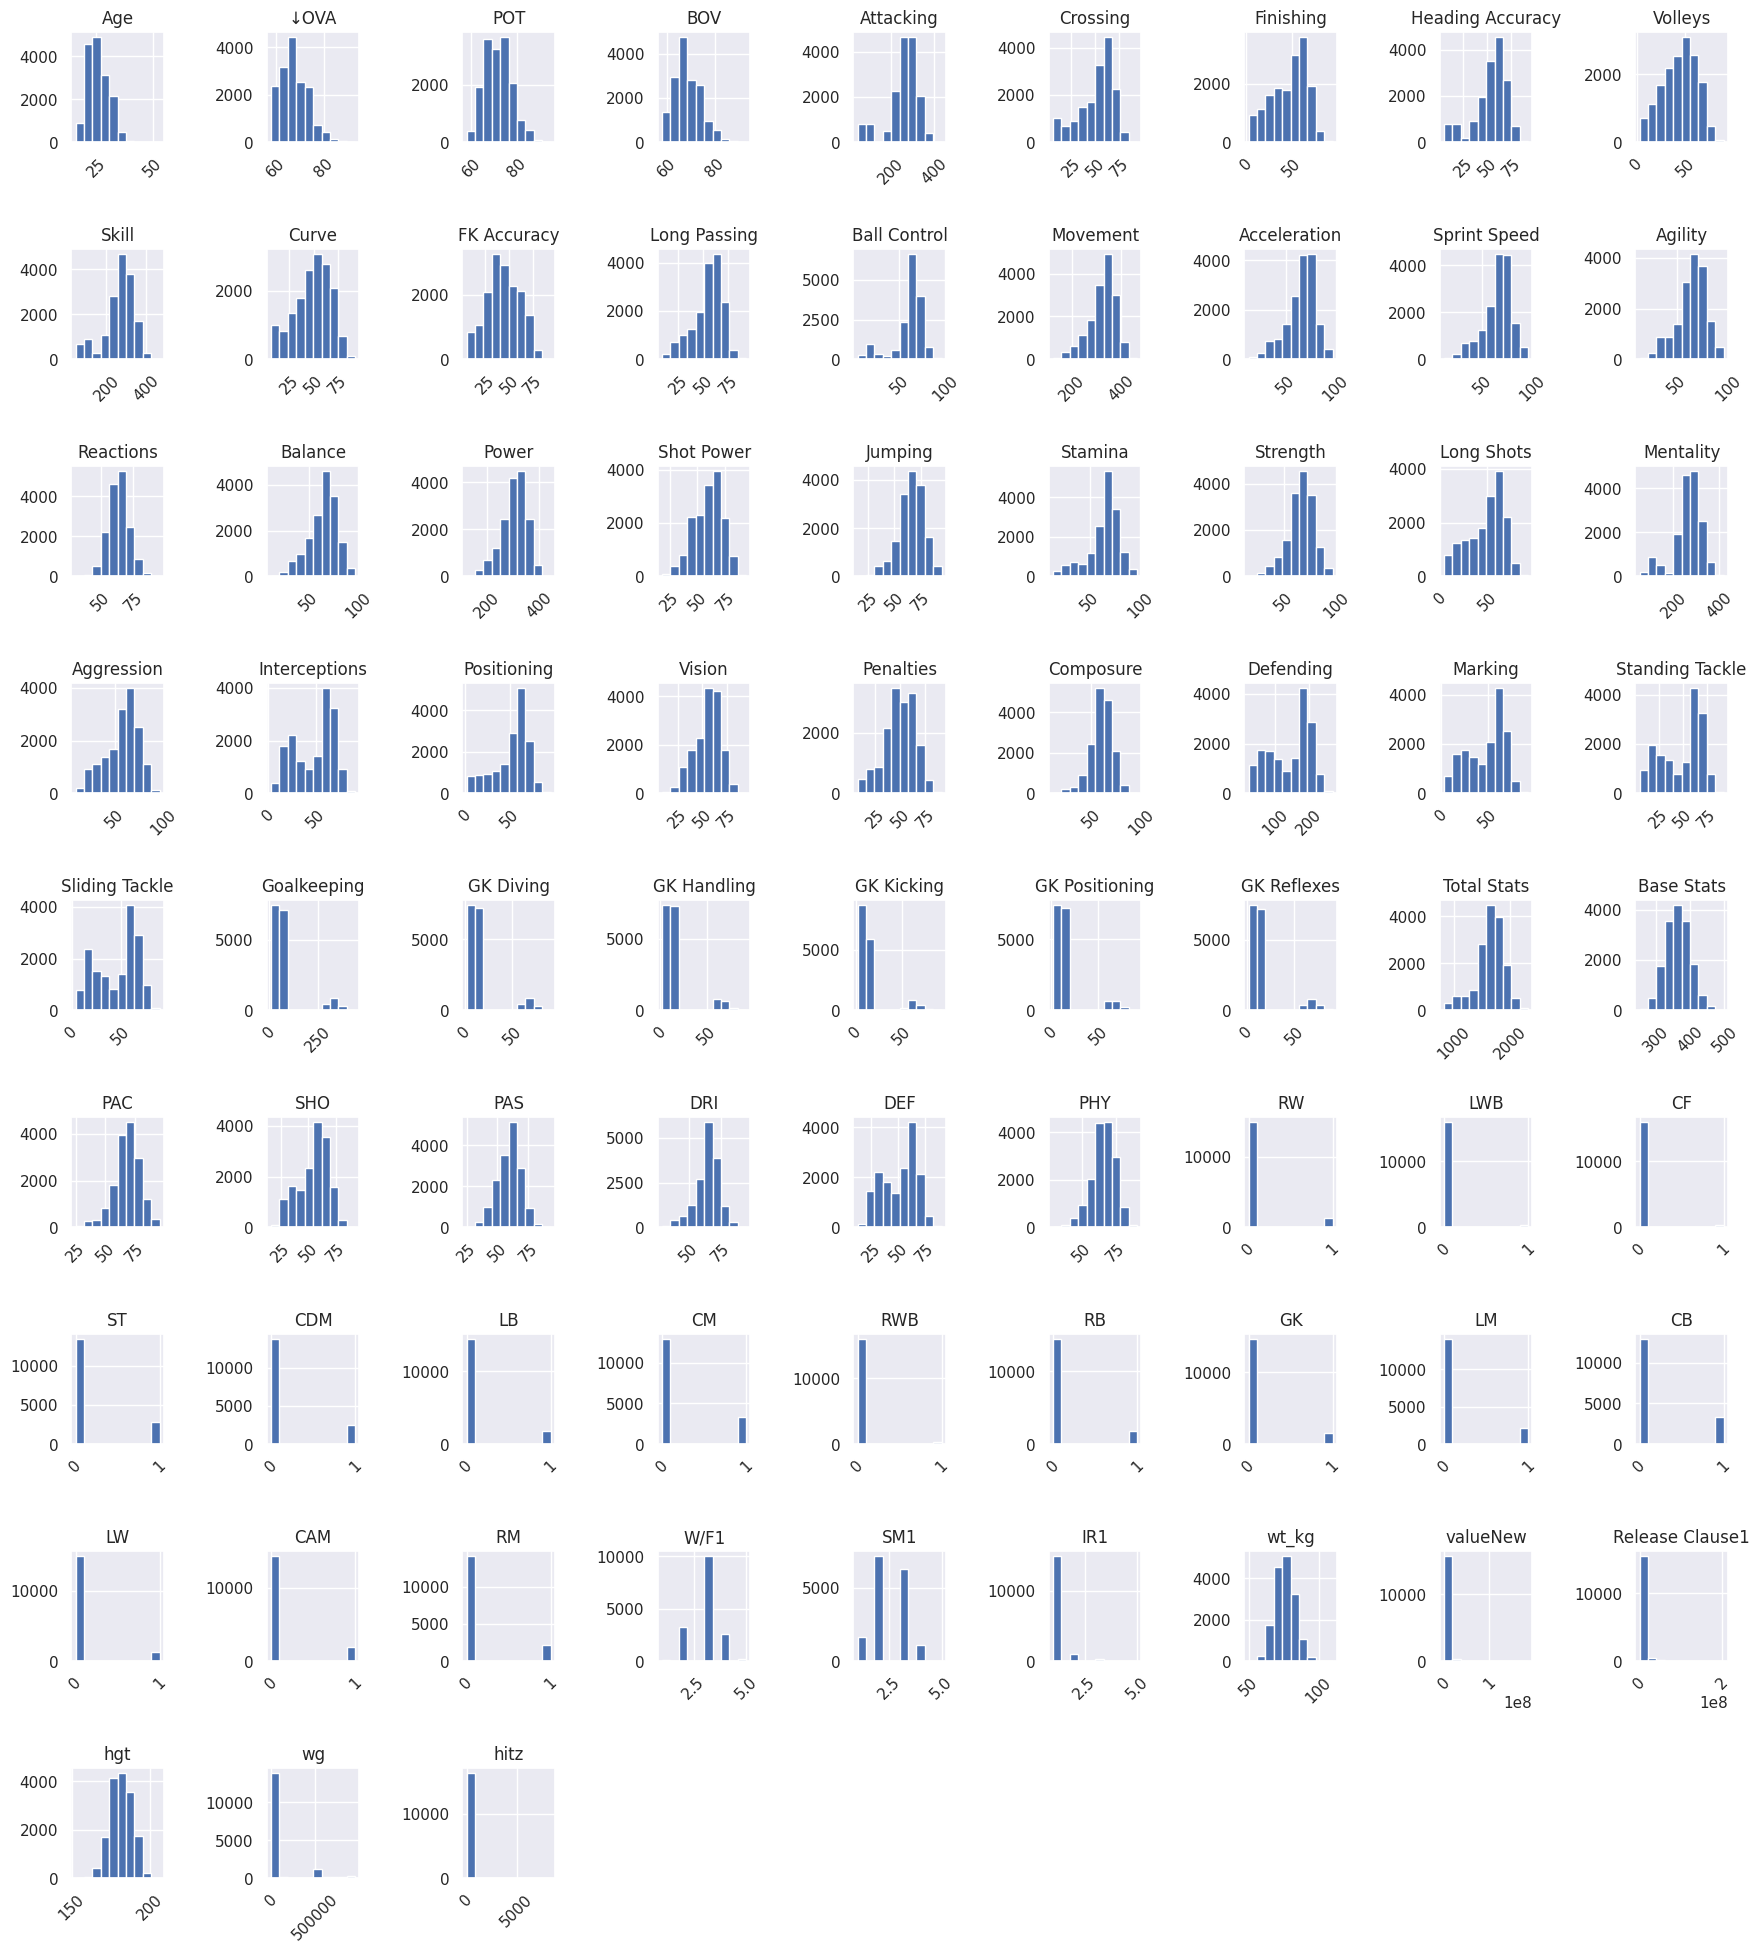

In [114]:
# show the distribution of df_clean
df_clean.hist(figsize=(18,20), xrot=45)
# Adjust spacing between subplots
plt.tight_layout(pad=2.0)
plt.show()

In [115]:
# Split the df_ml into features (X) and target variable (y)
X = df_clean.drop(columns=['hitz'])
y = df_ml['hitz']
X

,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,RW,LWB,CF,ST,CDM,LB,CM,RWB,RB,GK,LM,CB,LW,CAM,RM,W/F1,SM1,IR1,wt_kg,valueNew,Release Clause1,hgt,wg
0,33,93.0,93.0,93,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,85.0,92.0,91.0,95.0,38.0,65.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,5.0,72.0,103500000.0,138400000.0,170.0,560000.0
1,35,92.0,92.0,92,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,89.0,93.0,81.0,89.0,35.0,77.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,4.0,5.0,5.0,83.0,63000000.0,75900000.0,187.0,220000.0
2,27,91.0,93.0,91,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,87.0,92.0,78.0,90.0,52.0,90.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1.0,3.0,87.0,120000000.0,159400000.0,188.0,125000.0
3,29,91.0,91.0,91,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,76.0,86.0,93.0,88.0,64.0,78.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,5.0,4.0,4.0,70.0,129000000.0,161000000.0,181.0,370000.0
4,28,91.0,91.0,91,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,91.0,85.0,86.0,94.0,36.0,59.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5.0,5.0,5.0,68.0,132000000.0,166500000.0,175.0,270000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,28,58.0,58.0,59,258.0,54.0,53.0,44.0,59,48.0,286.0,56,57.0,58.0,55.0,60.0,330.0,65.0,60.0,73.0,59.0,73.0,268.0,54.0,40.0,61.0,58.0,55.0,271.0,54,53.0,55.0,61,48.0,61.0,130.0,38.0,50.0,42.0,51.0,7.0,11.0,7.0,12.0,14,1594.0,336,62.0,53.0,58.0,60.0,46.0,57.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,4.0,3.0,1.0,78.0,200000.0,202000.0,175.0,500000.0
16380,18,58.0,74.0,60,202.0,32.0,26.0,63.0,48,33.0,171.0,38,27.0,25.0,40.0,41.0,261.0,58.0,63.0,46.0,52.0,42.0,251.0,44.0,65.0,53.0,67.0,22.0,197.0,53,54.0,27.0,30,33.0,44.0,179.0,54.0,63.0,62.0,50.0,8.0,6.0,9.0,12.0,15,1311.0,289,61.0,30.0,38.0,41.0,58.0,61.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.0,2.0,1.0,78.0,475000.0,581000.0,195.0,1000.0
16381,24,58.0,64.0,58,108.0,15.0,19.0,22.0,40,12.0,134.0,22,19.0,23.0,38.0,32.0,278.0,59.0,58.0,52.0,52.0,57.0,213.0,41.0,58.0,35.0,59.0,20.0,147.0,30,27.0,12.0,49,29.0,47.0,59.0,25.0,16.0,18.0,287.0,61.0,56.0,54.0,55.0,61,1226.0,345,61.0,56.0,54.0,61.0,58.0,55.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0,1.0,1.0,78.0,250000.0,0.0,193.0,1000.0
16382,17,58.0,75.0,59,256.0,51.0,59.0,43.0,51,52.0,260.0,59,51.0,42.0,48.0,60.0,343.0,82.0,80.0,71.0,45.0,65.0,221.0,56.0,43.0,46.0,36.0,40.0,214.0,32,23.0,55.0,50,54.0,48.0,84.0,24.0,29.0,31.0,60.0,10.0,14.0,12.0,9.0,15,1438.0,311,81.0,54.0,50.0,60.0,28.0,38.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,2.0,1.0,70.0,500000.0,494000.0,177.0,500000.0


In [116]:
y # check the target variable

0        771.0
1        562.0
2        150.0
3        207.0
4        595.0
         ...  
16379      3.0
16380      1.0
16381      5.0
16382      3.0
16383      4.0
Name: hitz, Length: 16233, dtype: float64

In [117]:
X['Short Passing'].unique()

array(['91', '82', '43', '94', '87', '84', '45', '83', '61', '79', '85',
       '33', '55', '86', '57', '81', '42', '74', '93', '88', '30', '65',
       '89', '77', '32', '50', '80', '78', '90', '69', '40', '92', '75',
       '73', '34', '76', '35', '70', '37', '23', '44', '38', '48', '26',
       '60', '25', '46', '28', '36', '51', '17', '18', '39', '71', '67',
       '27', '72', '66', '20', '31', '29', '68', '11', '64', '62', '41',
       '63', '19', '54', '16', '69_', '24', '22', '49', '59', '14', '58',
       '15', '21', '52', '56', '53', '12', '47', '13', 58, 65, 70, 67, 66,
       57, 72, 37, 26, 60, 64, 55, 56, 59, 68, 21, 74, 42, 63, 62, 47, 22,
       52, 15, 12, 73, 61, 54, 71, 25, 28, 27, 31, 69, 50, 75, 29, 36, 41,
       32, 53, 48, 30, 11, 35, 16, 51, 18, 43, 19, 34, 33, 23, 38, 20, 13,
       39, 49, 24, 46, 17, 8, 14, 45, 44, 40, 76, 7], dtype=object)

In [118]:
mapping = {'69_': 69}  # Map 'missing' to 69
X['Short Passing'] = [mapping.get(x, x) for x in X['Short Passing']]  # Replace specific values

In [119]:
#Ceck if the error has been corrected
X['Short Passing'].unique()

array(['91', '82', '43', '94', '87', '84', '45', '83', '61', '79', '85',
       '33', '55', '86', '57', '81', '42', '74', '93', '88', '30', '65',
       '89', '77', '32', '50', '80', '78', '90', '69', '40', '92', '75',
       '73', '34', '76', '35', '70', '37', '23', '44', '38', '48', '26',
       '60', '25', '46', '28', '36', '51', '17', '18', '39', '71', '67',
       '27', '72', '66', '20', '31', '29', '68', '11', '64', '62', '41',
       '63', '19', '54', '16', 69, '24', '22', '49', '59', '14', '58',
       '15', '21', '52', '56', '53', '12', '47', '13', 58, 65, 70, 67, 66,
       57, 72, 37, 26, 60, 64, 55, 56, 59, 68, 21, 74, 42, 63, 62, 47, 22,
       52, 15, 12, 73, 61, 54, 71, 25, 28, 27, 31, 50, 75, 29, 36, 41, 32,
       53, 48, 30, 11, 35, 16, 51, 18, 43, 19, 34, 33, 23, 38, 20, 13, 39,
       49, 24, 46, 17, 8, 14, 45, 44, 40, 76, 7], dtype=object)

In [120]:
X['Dribbling'].unique()

array(['96', '88', '12', '95', '85', '90', '27', '92', '21', '70', '91',
       '69', '13', '30', '87', '65', '79', '83', '23', '80', '18', '93',
       '77', '63', '76', '16', '59', '81', '11', '84', '10', '75', '78',
       '55', '15', '86', '66', '67', '28', '57', '64', '82', '62', '19',
       '53', '72', '50', '26', '43', '89', '73', '20', '14', '68', '71',
       '74', '22', '54', '56', '61', '9', '24', '60', '25', '8', '17',
       '47', '58', '46', '51', '52', '49', '44', '35', '48', '39', '29',
       '40', '70_', '42', '45', '34', '31', '33', '38', '41', '32', '7',
       '37', '36', '5', '6', 64, 46, 65, 61, 57, 60, 71, 19, 41, 18, 63,
       70, 74, 62, 58, 12, 67, 52, 26, 50, 13, 32, 33, 14, 75, 49, 51, 76,
       16, 36, 59, 34, 68, 66, 72, 17, 54, 44, 73, 42, 56, 55, 37, 69, 40,
       30, 47, 24, 11, 15, 45, 35, 39, 38, 6, 7, 53, 43, 48, 10, 20, 29,
       9, 8, 28, 5, 31, 25, 22, 27, 23, 77, 21], dtype=object)

In [121]:
mapping = {'70_': 70}  # Map 'missing' to 70
X['Dribbling'] = [mapping.get(x, x) for x in X['Dribbling']]  # Replace specific values

In [122]:
# Check if the error has been corrected
X['Dribbling'].unique()

array(['96', '88', '12', '95', '85', '90', '27', '92', '21', '70', '91',
       '69', '13', '30', '87', '65', '79', '83', '23', '80', '18', '93',
       '77', '63', '76', '16', '59', '81', '11', '84', '10', '75', '78',
       '55', '15', '86', '66', '67', '28', '57', '64', '82', '62', '19',
       '53', '72', '50', '26', '43', '89', '73', '20', '14', '68', '71',
       '74', '22', '54', '56', '61', '9', '24', '60', '25', '8', '17',
       '47', '58', '46', '51', '52', '49', '44', '35', '48', '39', '29',
       '40', 70, '42', '45', '34', '31', '33', '38', '41', '32', '7',
       '37', '36', '5', '6', 64, 46, 65, 61, 57, 60, 71, 19, 41, 18, 63,
       74, 62, 58, 12, 67, 52, 26, 50, 13, 32, 33, 14, 75, 49, 51, 76, 16,
       36, 59, 34, 68, 66, 72, 17, 54, 44, 73, 42, 56, 55, 37, 69, 40, 30,
       47, 24, 11, 15, 45, 35, 39, 38, 6, 7, 53, 43, 48, 10, 20, 29, 9, 8,
       28, 5, 31, 25, 22, 27, 23, 77, 21], dtype=object)

In [123]:
# convert to float
X['Short Passing']= X['Short Passing'].astype(float)
X['Dribbling']=X['Dribbling'].astype(float)

In [124]:
# Check data types of each column in the DataFrame 'X'
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16233 entries, 0 to 16383
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               16233 non-null  int64  
 1   ↓OVA              16233 non-null  float64
 2   POT               16233 non-null  float64
 3   BOV               16233 non-null  int64  
 4   Attacking         16233 non-null  float64
 5   Crossing          16233 non-null  float64
 6   Finishing         16233 non-null  float64
 7   Heading Accuracy  16233 non-null  float64
 8   Short Passing     16233 non-null  float64
 9   Volleys           16233 non-null  float64
 10  Skill             16233 non-null  float64
 11  Dribbling         16233 non-null  float64
 12  Curve             16233 non-null  float64
 13  FK Accuracy       16233 non-null  float64
 14  Long Passing      16233 non-null  float64
 15  Ball Control      16233 non-null  float64
 16  Movement          16233 non-null  float6

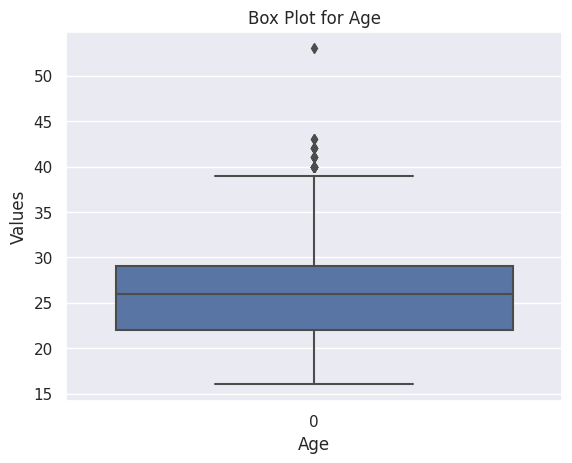

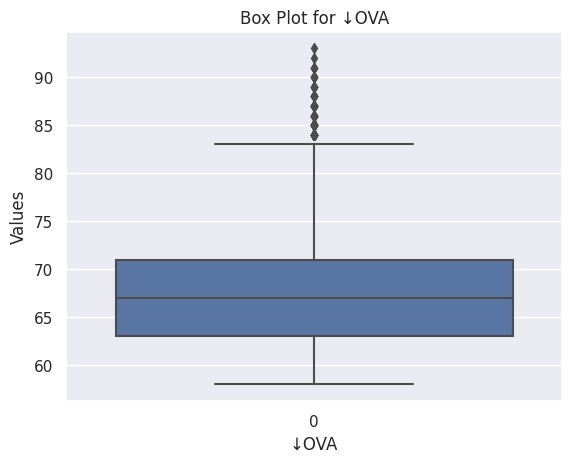

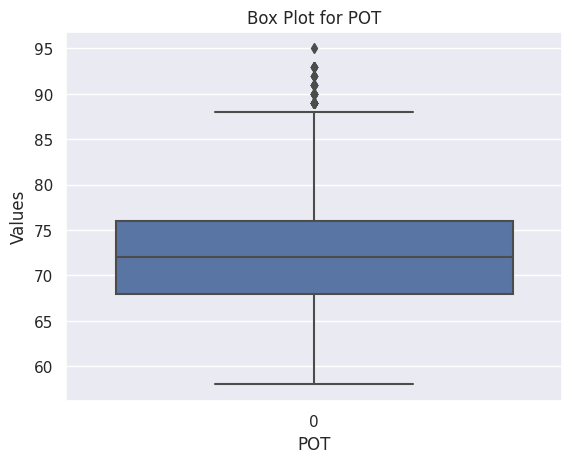

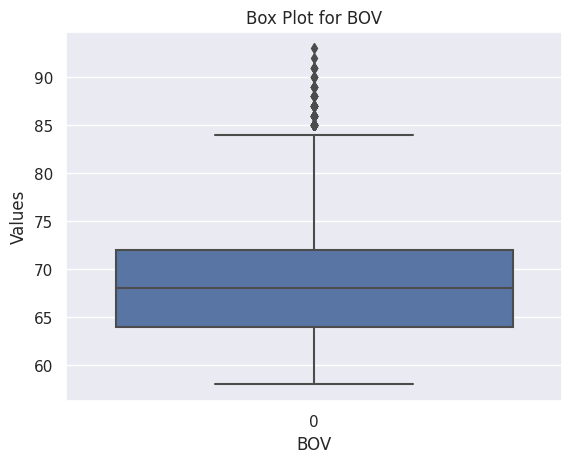

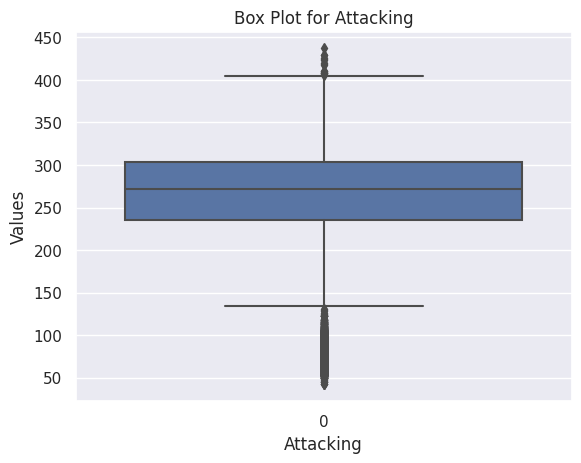

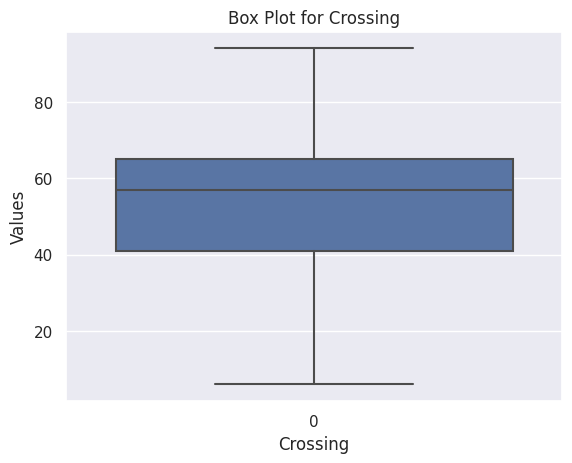

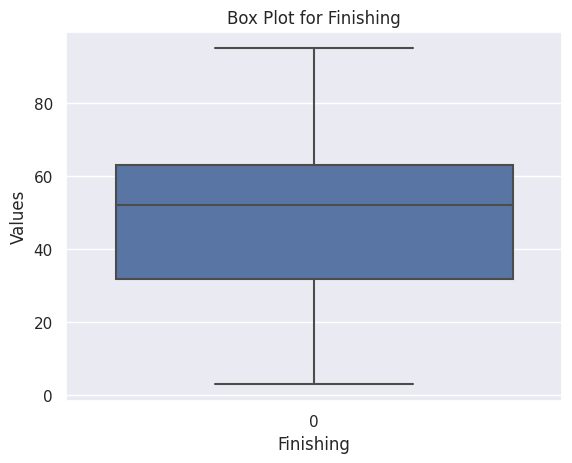

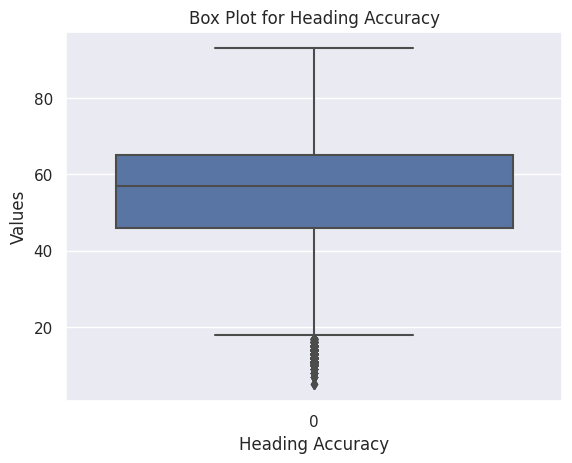

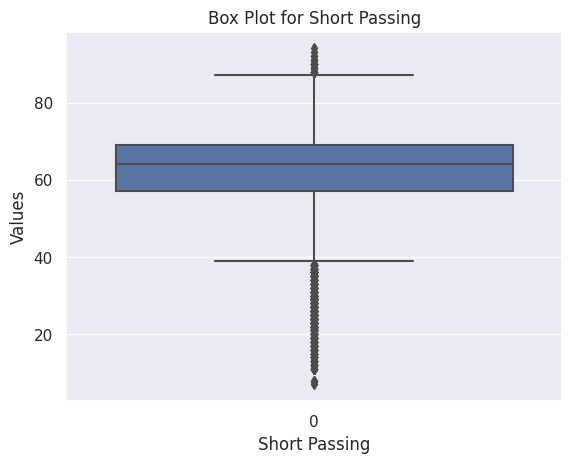

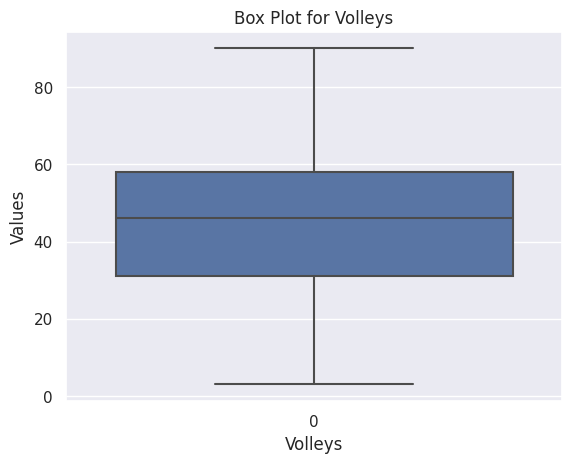

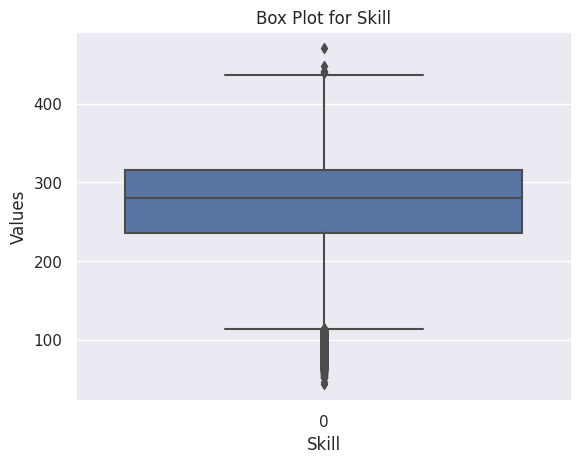

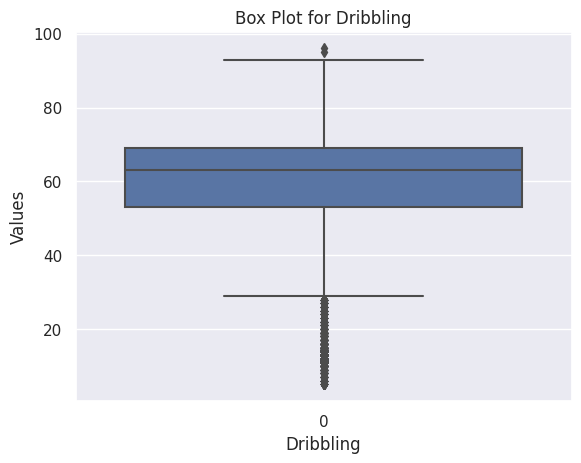

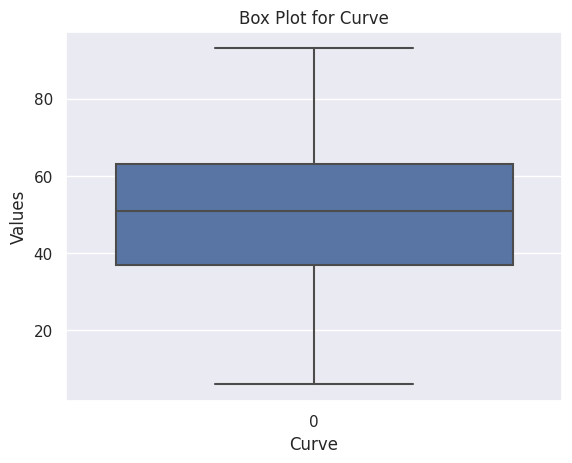

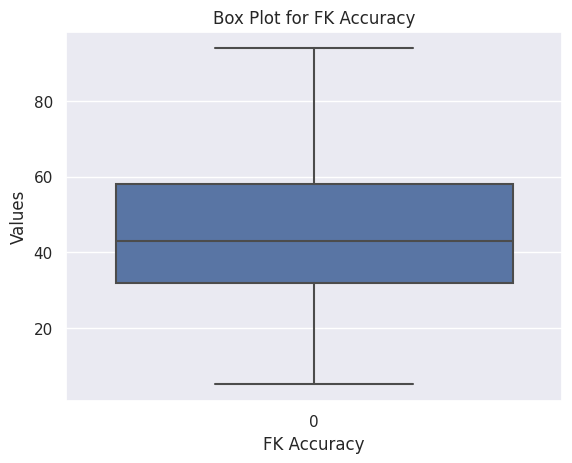

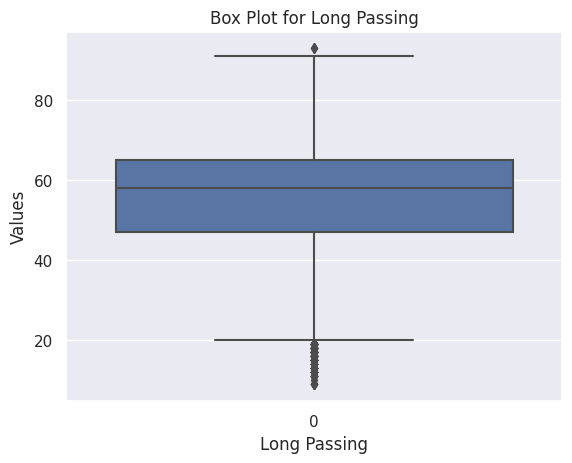

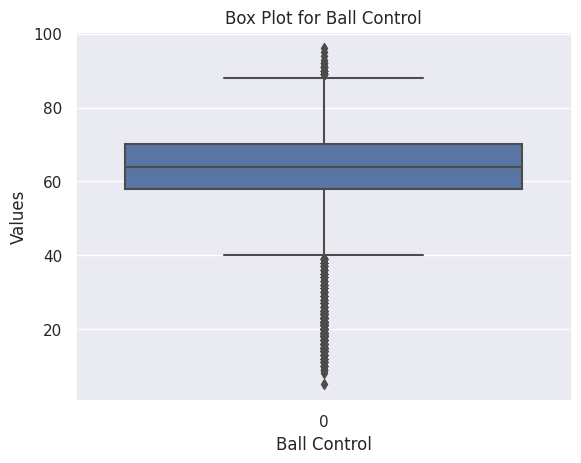

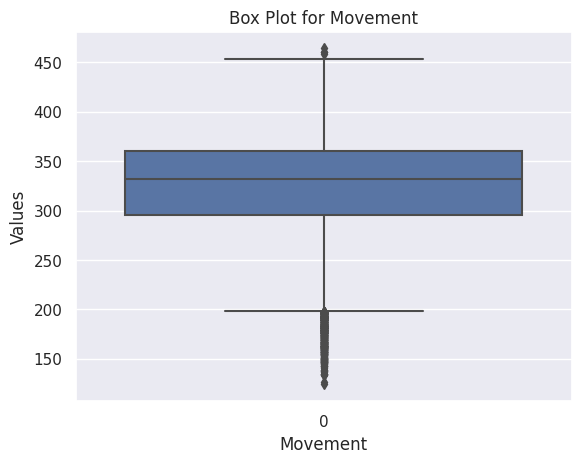

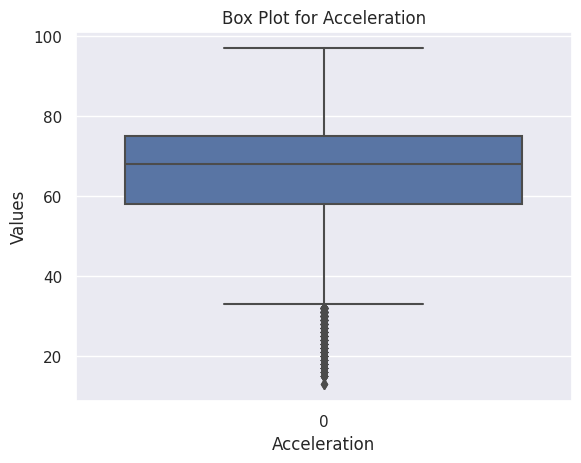

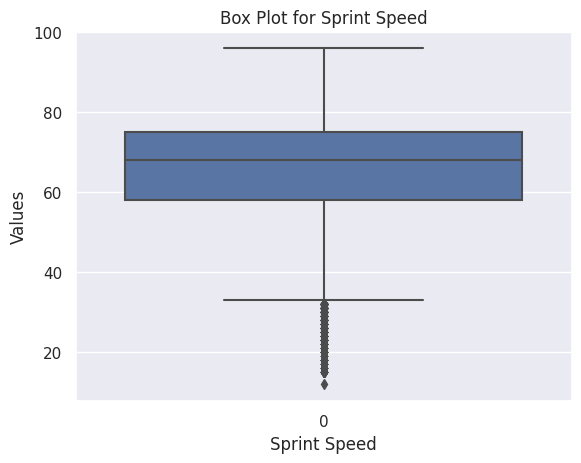

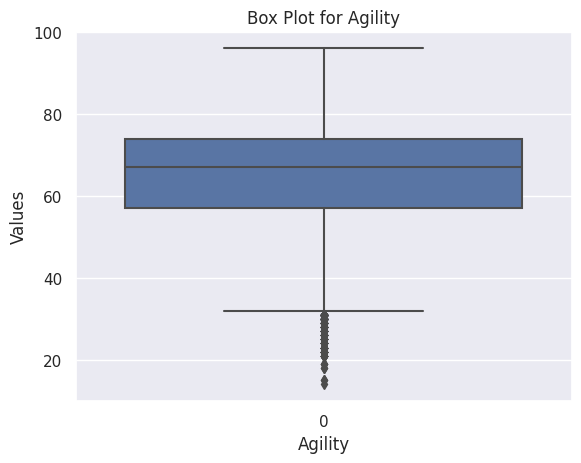

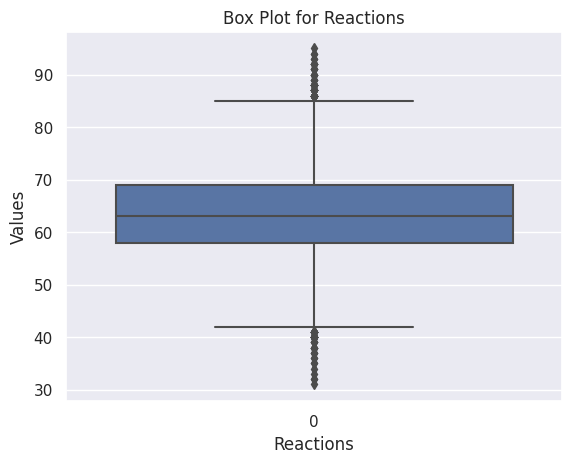

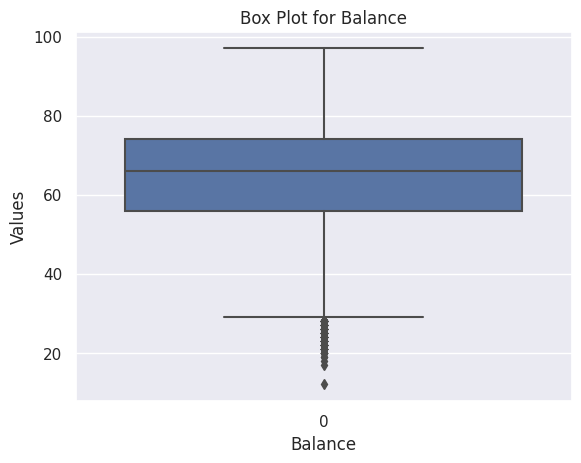

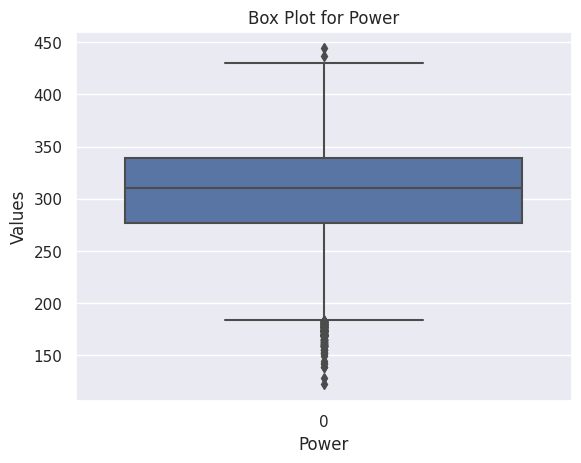

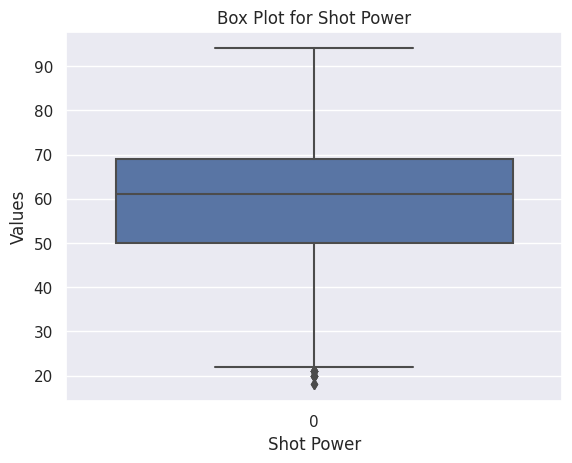

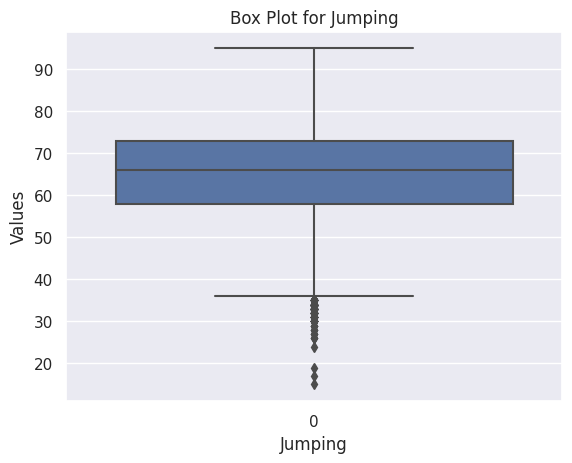

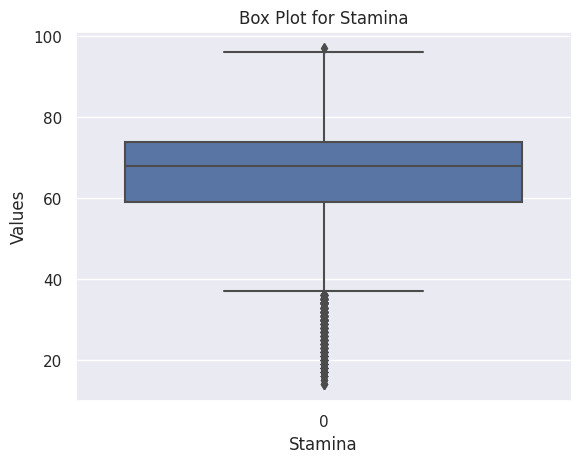

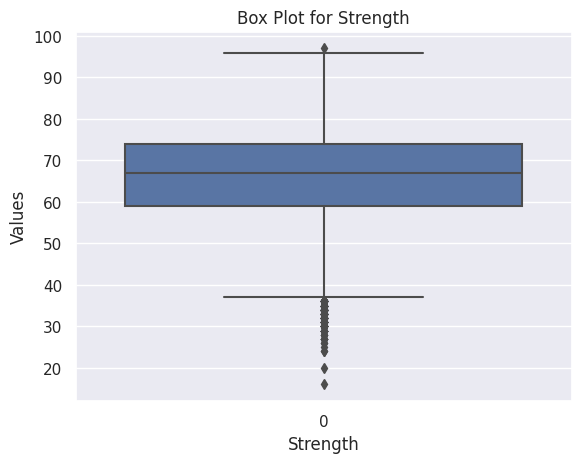

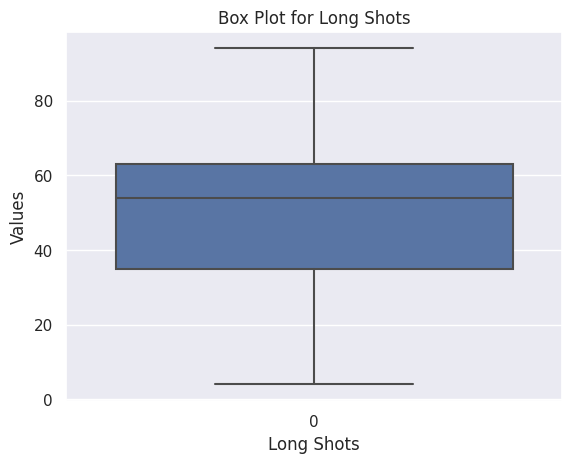

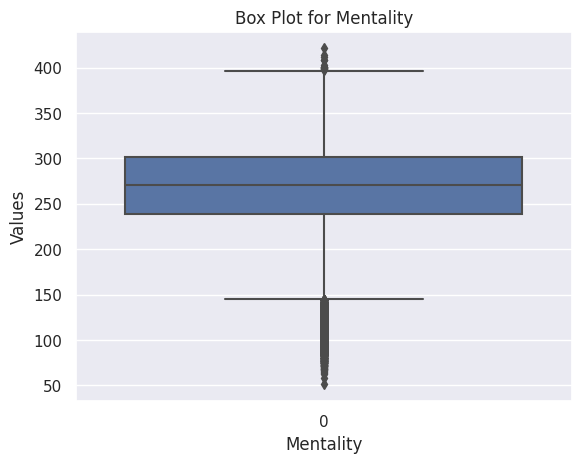

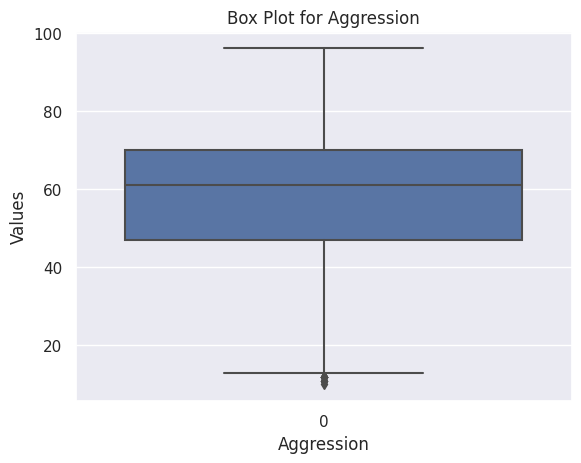

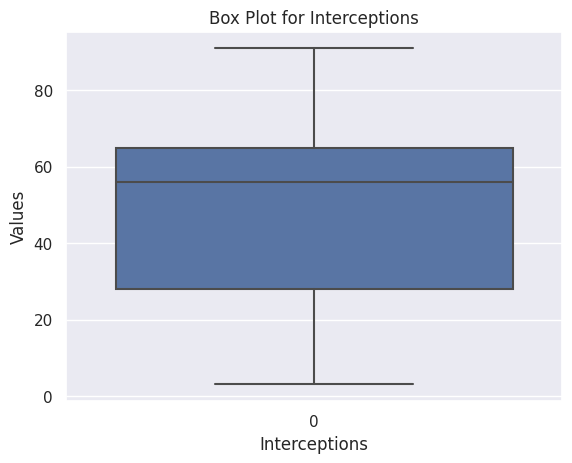

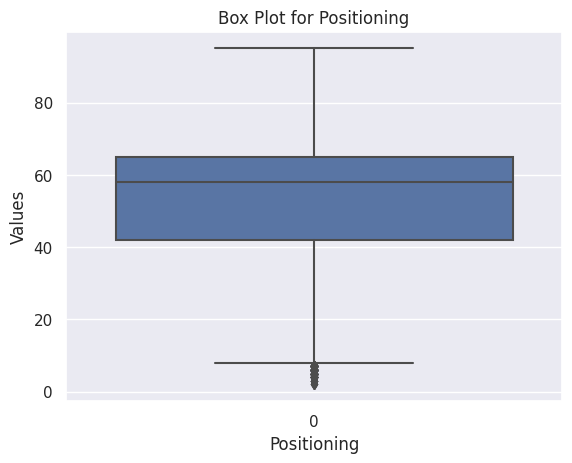

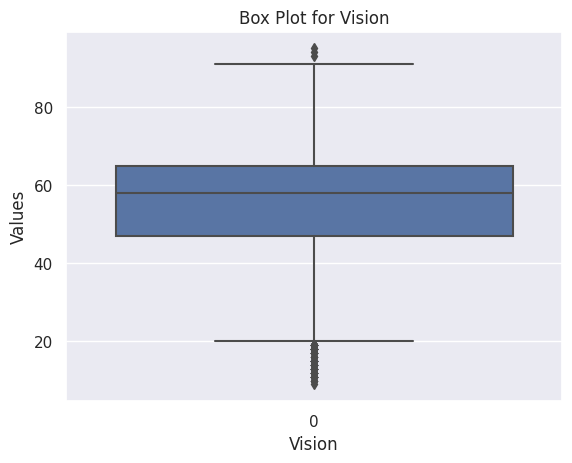

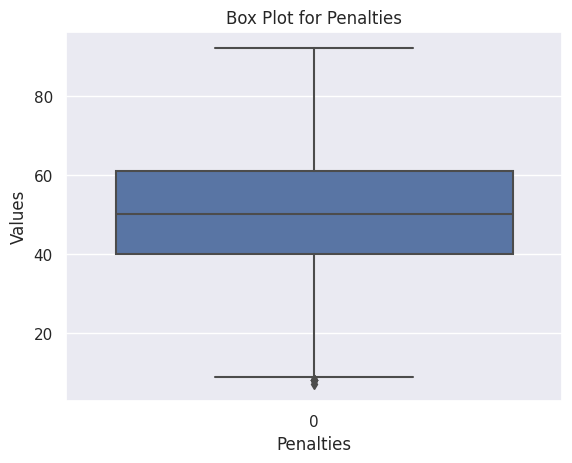

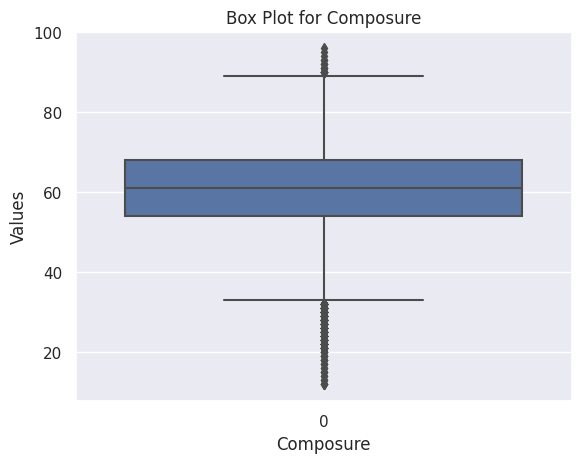

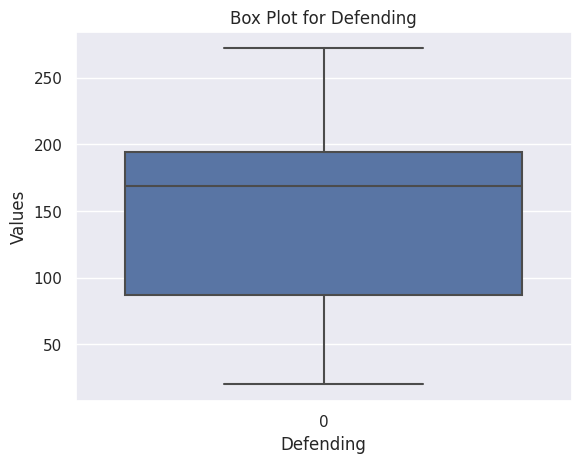

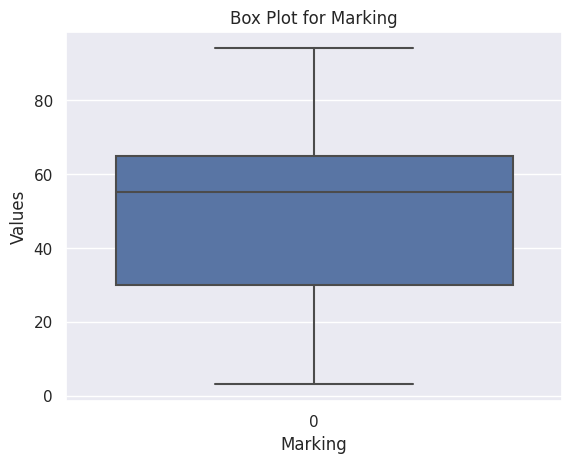

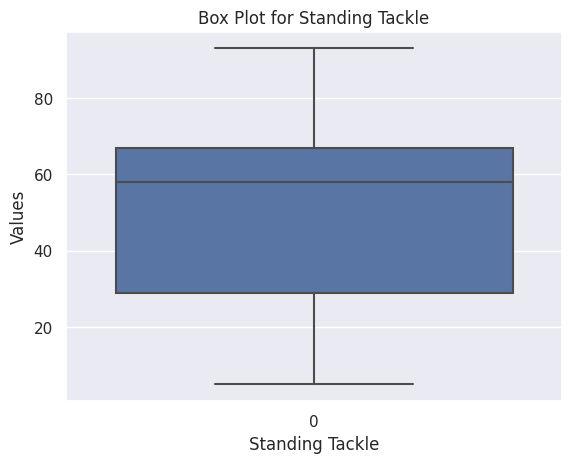

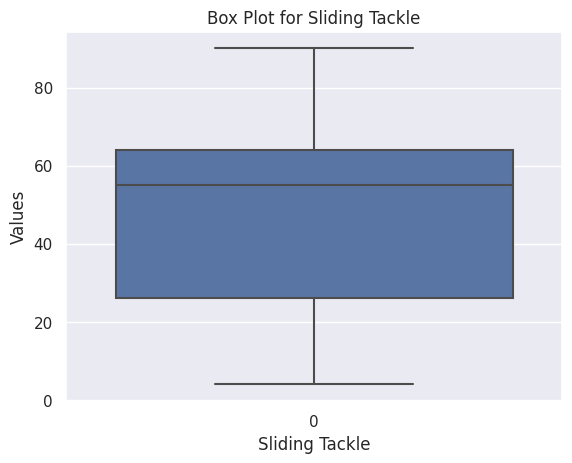

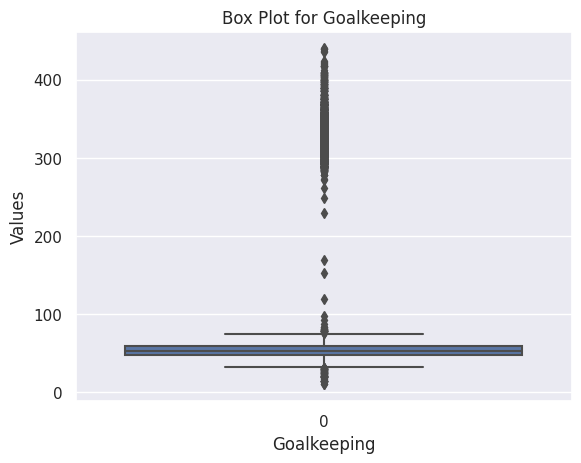

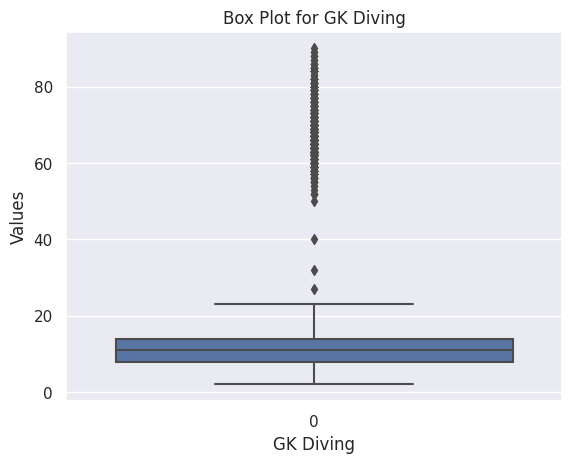

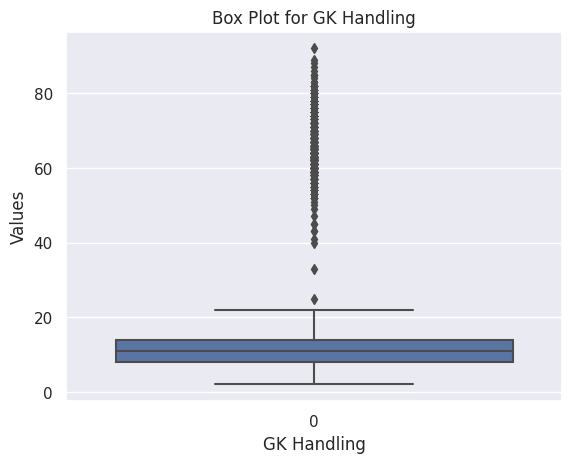

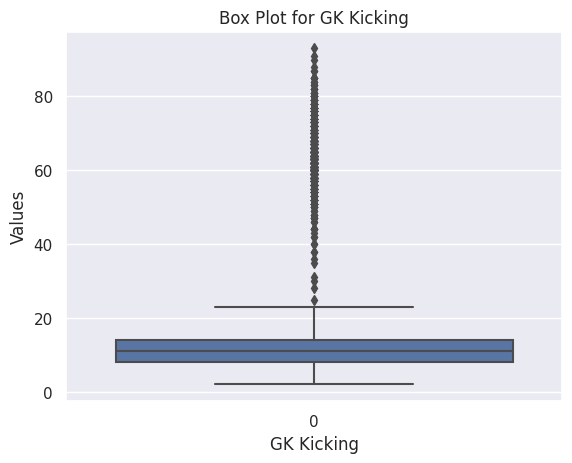

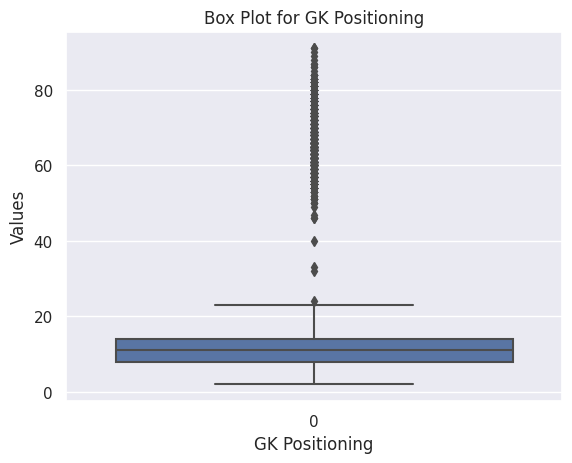

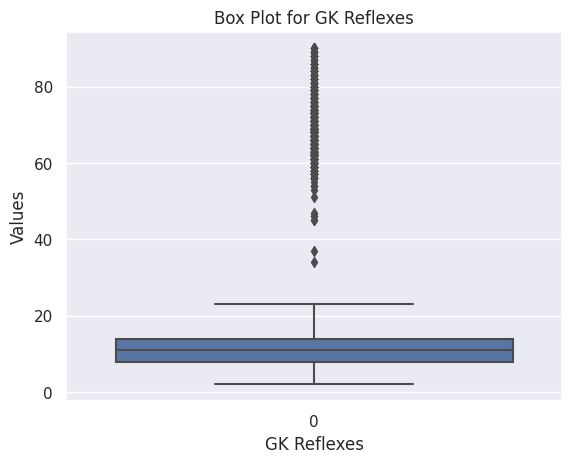

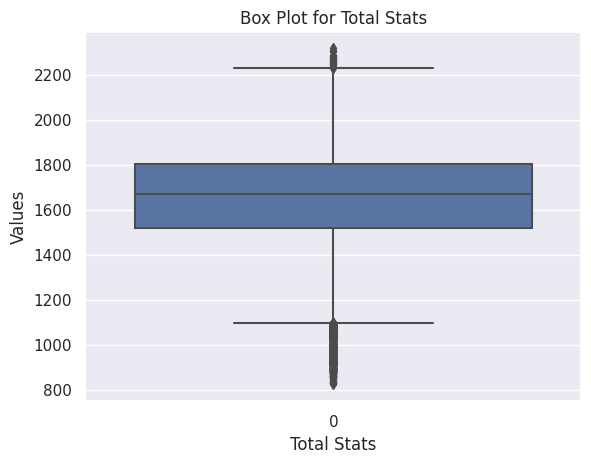

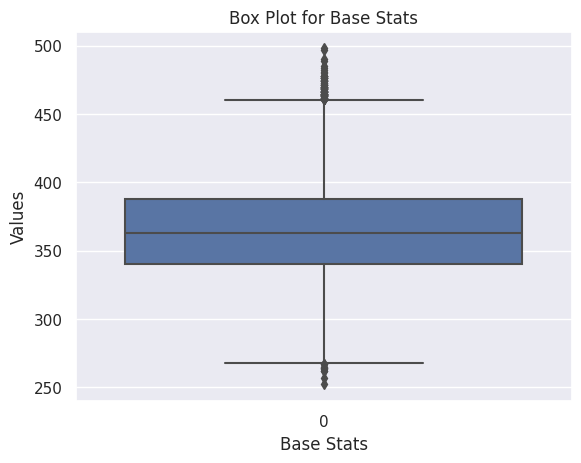

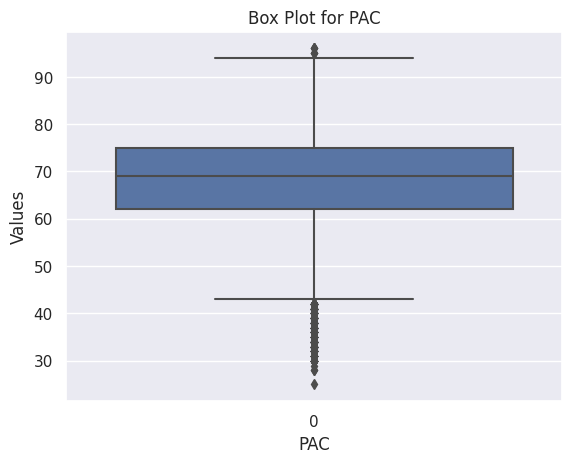

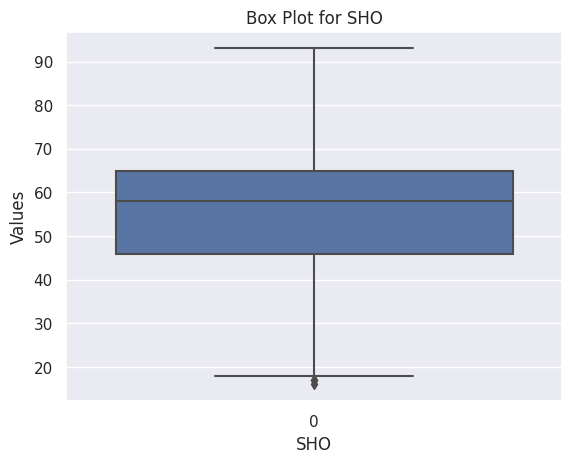

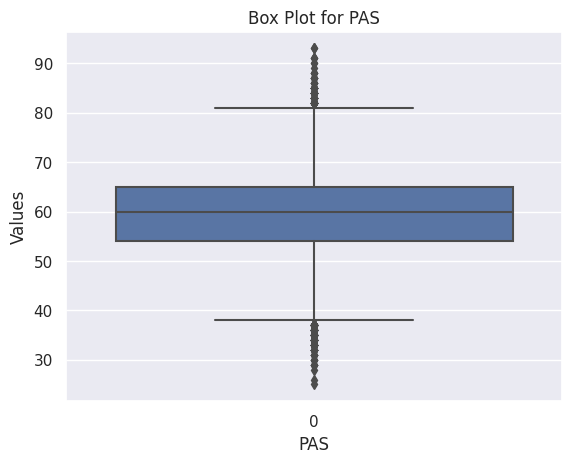

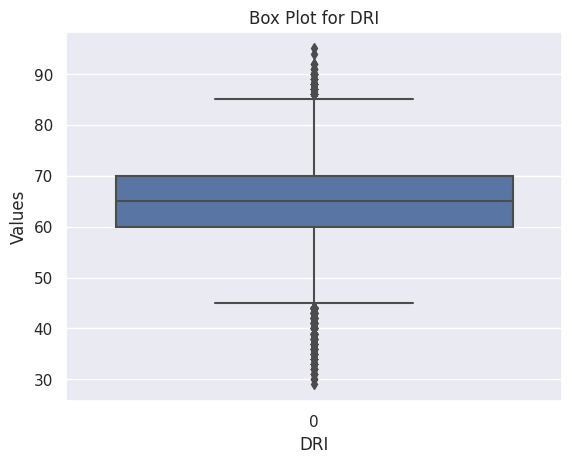

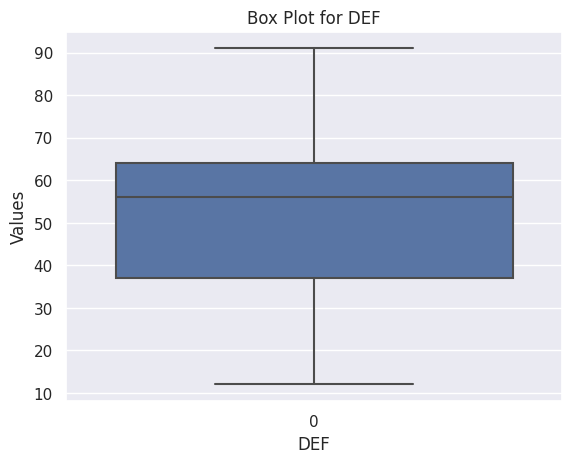

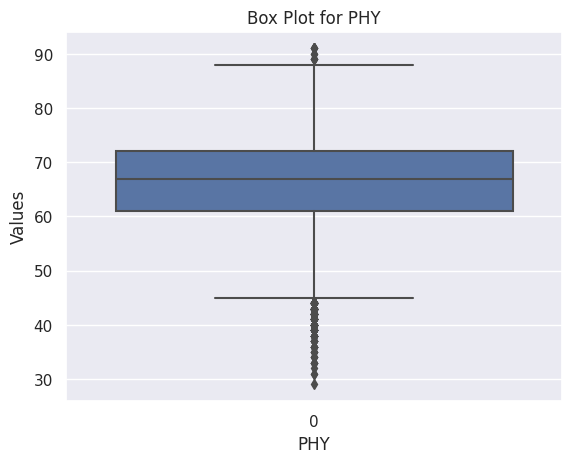

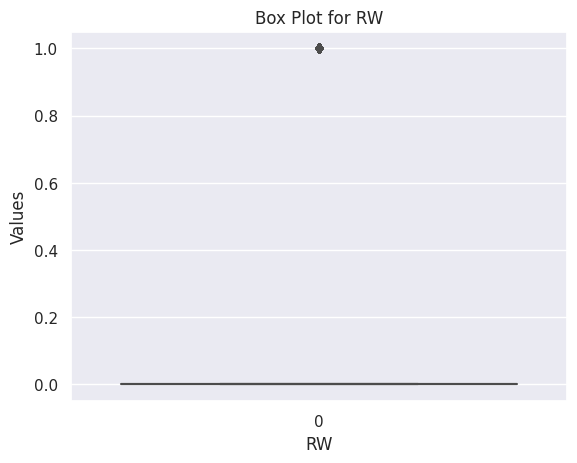

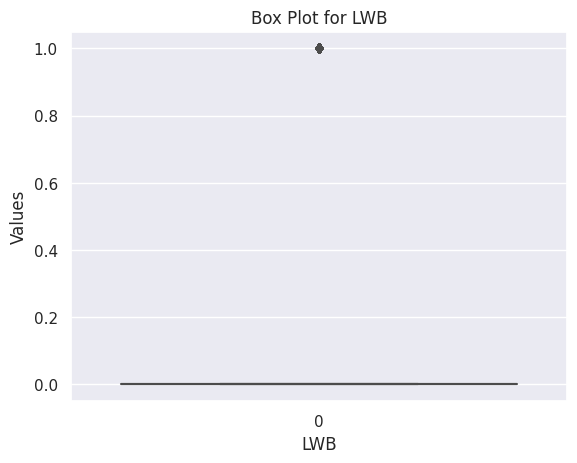

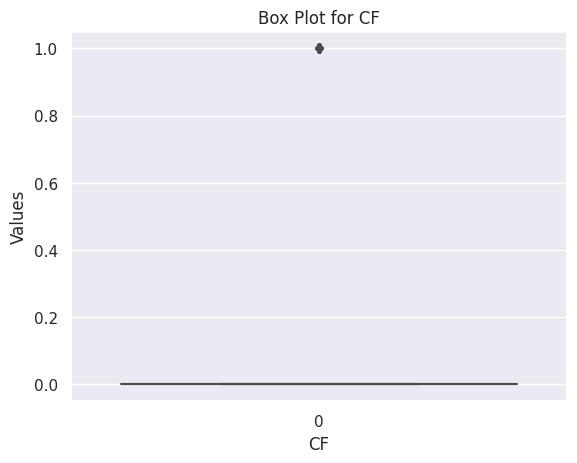

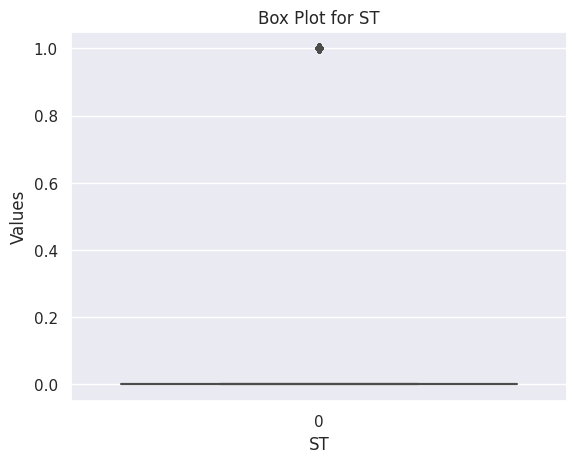

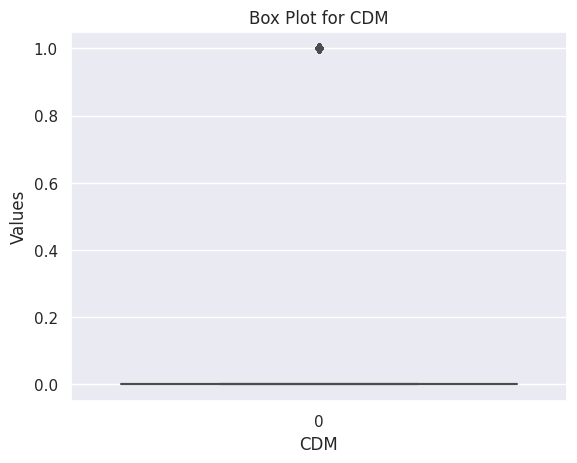

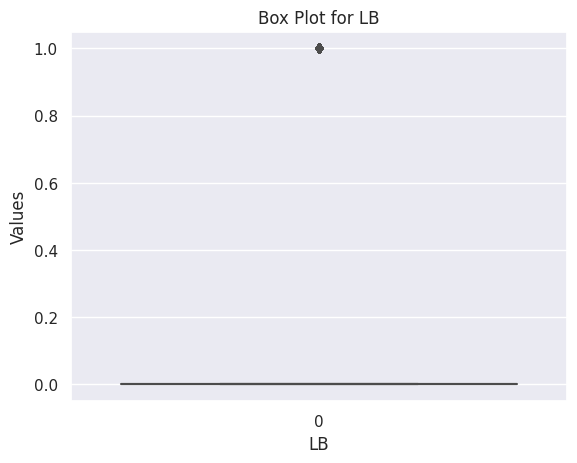

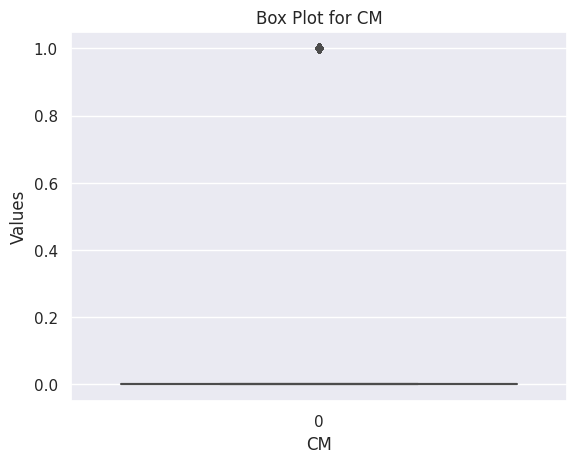

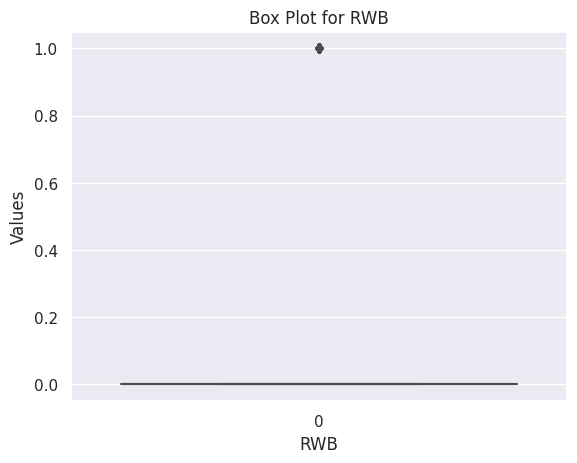

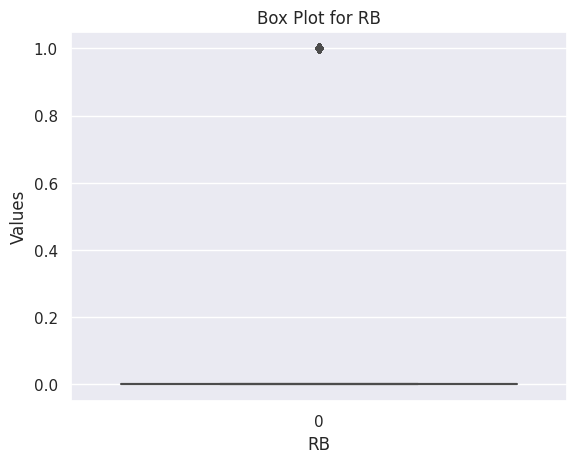

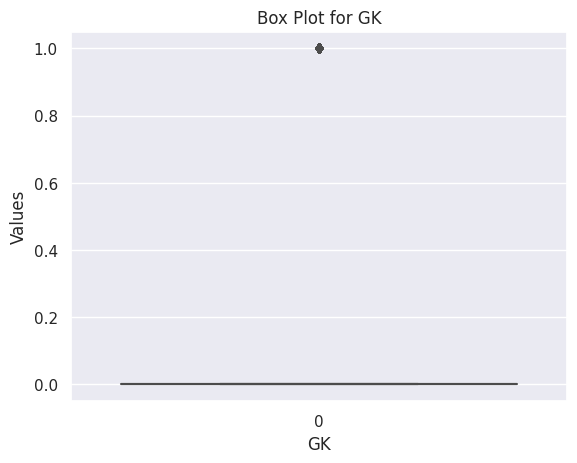

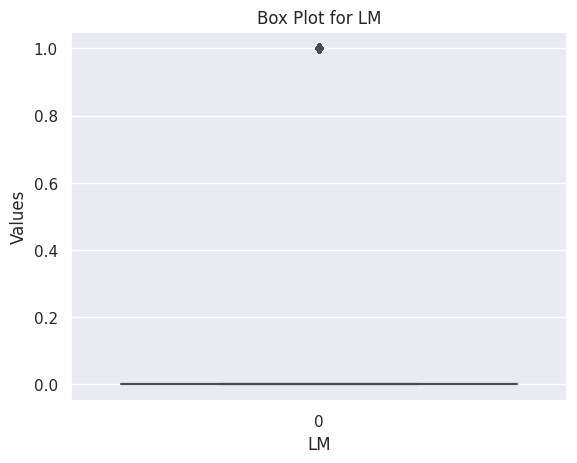

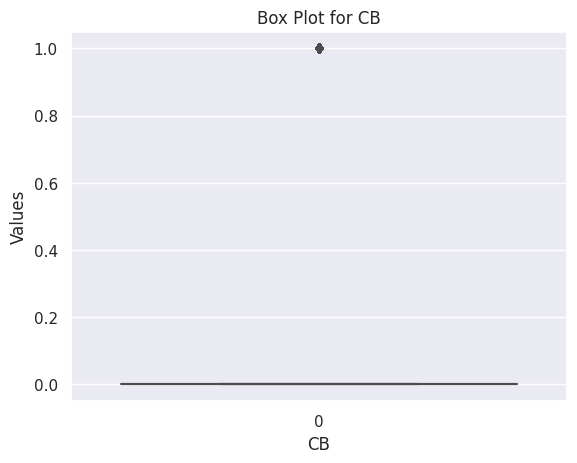

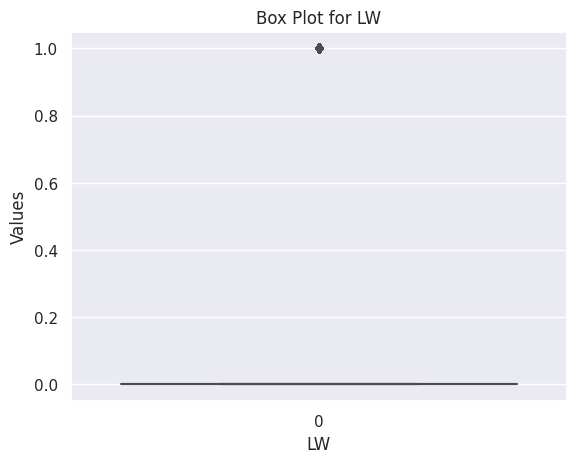

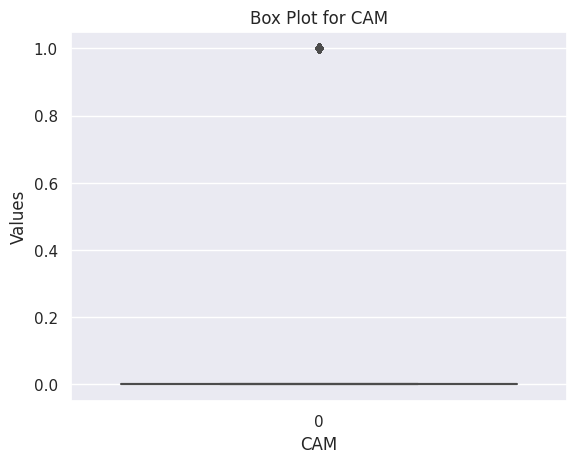

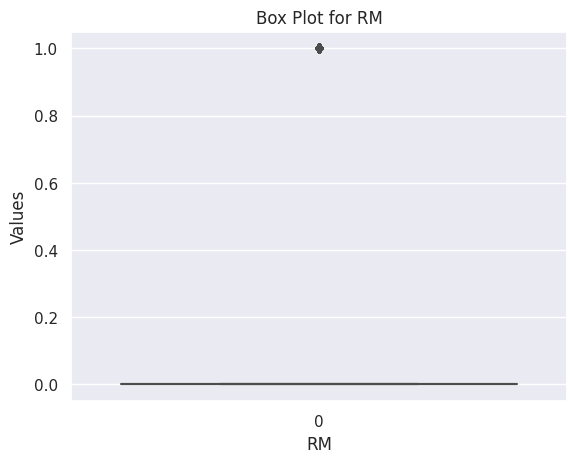

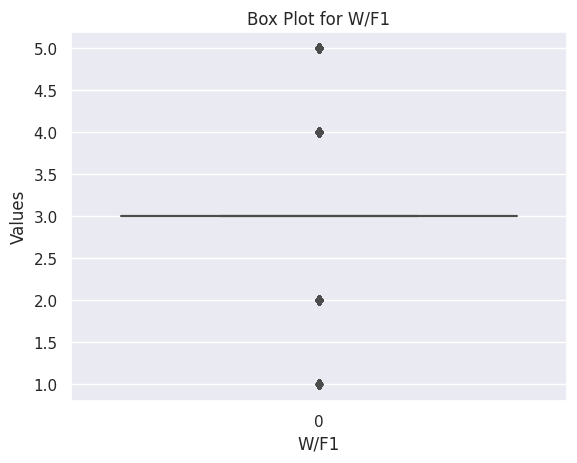

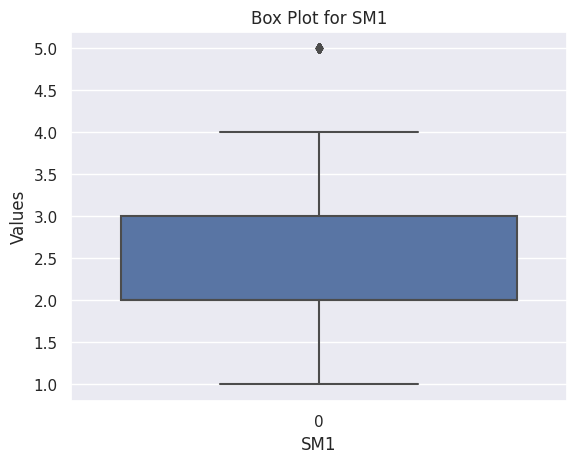

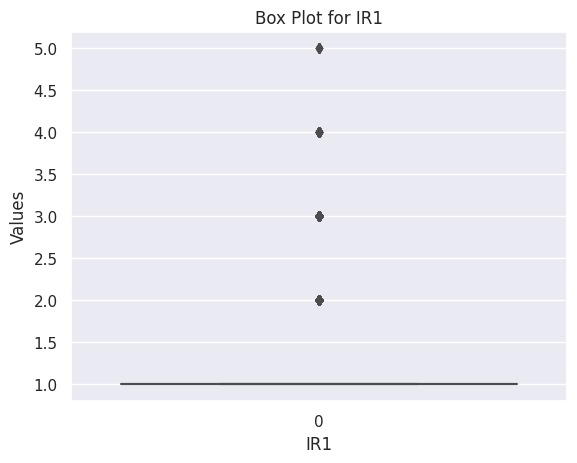

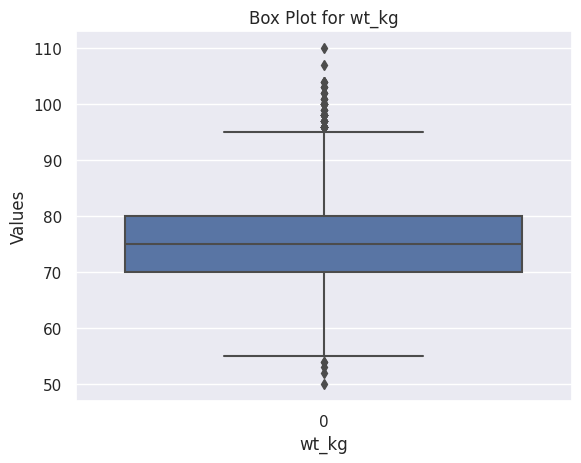

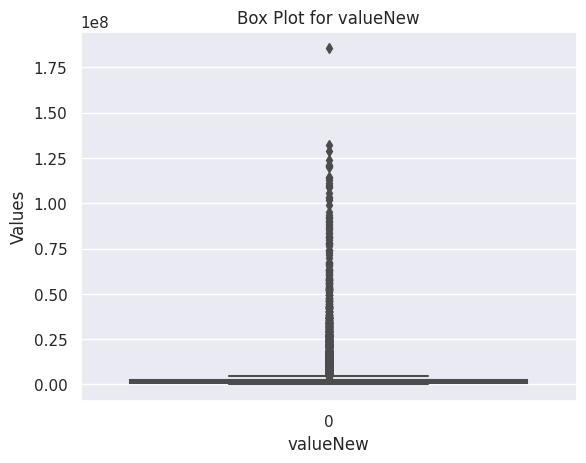

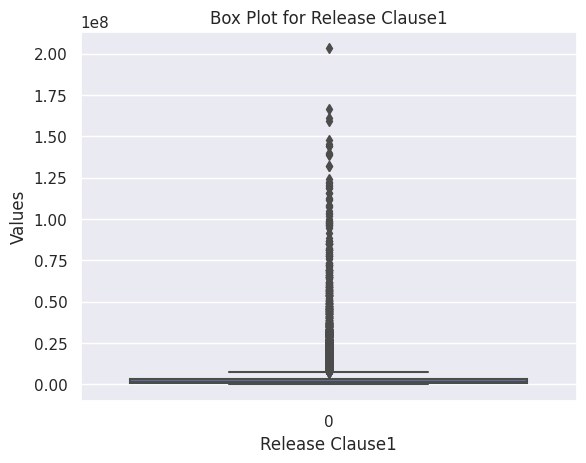

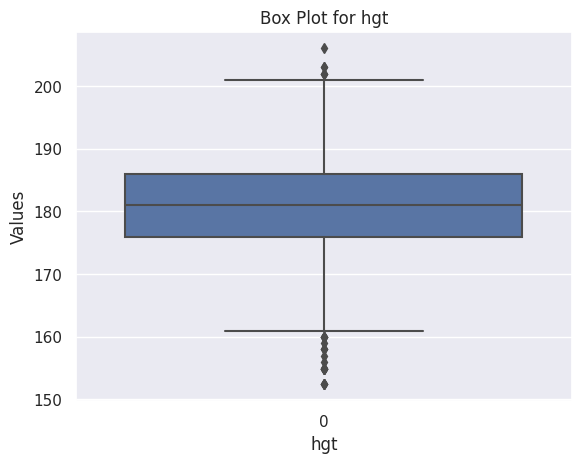

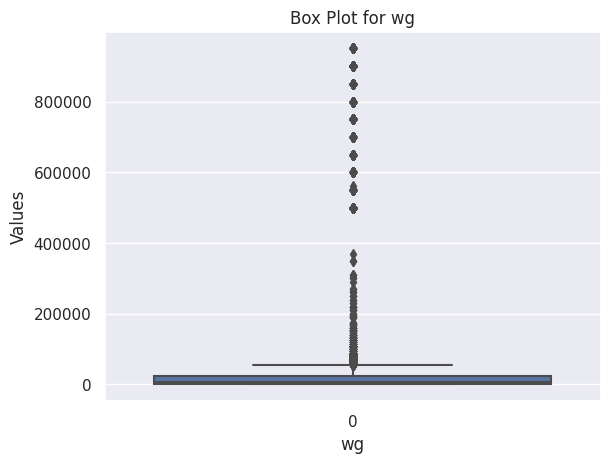

In [125]:
# Plot box plots for numeric columns
for col in X.columns:
    sns.boxplot(X[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()

In [126]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize StandardScaler or MinMaxScaler
scaler = StandardScaler()  # Use StandardScaler for standardization or MinMaxScaler for rescaling

# Fit and transform the scaler on your input data
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.57529281,  4.54604342,  3.60633705, ..., 12.9362807 ,
        -1.63962872,  2.11059671],
       [ 2.01995279,  4.36810315,  3.43602411, ...,  6.89923396,
         0.83272969,  0.56369251],
       [ 0.24131288,  4.19016288,  3.60633705, ..., 14.96472841,
         0.97816254,  0.13146928],
       ...,
       [-0.42567708, -1.68186605, -1.33273842, ..., -0.43215561,
         1.70532678, -0.43269578],
       [-1.98198699, -1.68186605,  0.540704  , ..., -0.38443879,
        -0.62159879,  1.83761362],
       [-1.31499703, -1.68186605,  0.540704  , ..., -0.36241565,
         0.97816254, -0.4144969 ]])

In [127]:
Y=y.values
Y

array([771., 562., 150., ...,   5.,   3.,   4.])

In [128]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [129]:
# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest Regressor on your scaled data
rf_regressor.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [130]:
# Make predictions on the test data
y_pred = rf_regressor.predict(xtest)

In [131]:
# Calculate mean squared error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R^2)
r_squared = r2_score(ytest, y_pred)
print("R-squared (R^2):", r_squared)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Explained Variance Score
explained_variance = explained_variance_score(ytest, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error: 3569.584333538651
Root Mean Squared Error (RMSE): 59.74599847302454
Mean Absolute Error (MAE): 14.31156144133046
R-squared (R^2): 0.3427094082330122
Mean Absolute Percentage Error (MAPE): 1.3045091643740432
Explained Variance Score: 0.3460959144456145


Using ensemble approach

In [132]:
#X_scaled is your scaled input features and y is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Initialize the individual models
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the individual models
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Make predictions using the individual models
y_pred_rf = random_forest.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)

# Ensemble predictions using simple average
y_pred_ensemble = (y_pred_rf + y_pred_gb) / 2

In [133]:
# performance evaluation metrics
# Calculate the Mean Squared Error (MSE) for the ensemble predictions
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
print("Ensemble Mean Squared Error:", mse_ensemble)
# Root Mean Squared Error (RMSE)
rmse2 = np.sqrt(mse_ensemble)
print("Ensemble Root Mean Squared Error (RMSE):", rmse2)

# Mean Absolute Error (MAE)
mae2 = mean_absolute_error(y_test, y_pred_ensemble)
print("Ensemble Mean Absolute Error (MAE):", mae2)

# R-squared (R^2)
r_squared2 = r2_score(y_test, y_pred_ensemble)
print("Ensemble R-squared (R^2):", r_squared2)

# Mean Absolute Percentage Error (MAPE)
mape2 = mean_absolute_percentage_error(y_test, y_pred_ensemble)
print("Ensemble Mean Absolute Percentage Error (MAPE):", mape2)

# Explained Variance Score
explained_variance2 = explained_variance_score(y_test, y_pred_ensemble)
print("Ensemble Explained Variance Score:", explained_variance2)

Ensemble Mean Squared Error: 2626.833592488732
Ensemble Root Mean Squared Error (RMSE): 51.25264473652781
Ensemble Mean Absolute Error (MAE): 13.39758327452078
Ensemble R-squared (R^2): 0.5163041841432865
Ensemble Mean Absolute Percentage Error (MAPE): 1.2862763909709085
Ensemble Explained Variance Score: 0.5179511863070644


In [134]:
# performance evaluation metrics
# Calculate the Mean Squared Error (MSE) for the gradient boosting regessor predictions alon
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("gb Mean Squared Error:", mse_gb)
# Root Mean Squared Error (RMSE)
rmse_gb = np.sqrt(mse_gb)
print("gb Root Mean Squared Error (RMSE):", rmse_gb)
# R-squared (R^2)
r_squared_gb = r2_score(y_test, y_pred_gb)
print("gb R-squared (R^2):", r_squared_gb)

gb Mean Squared Error: 2589.445238004854
gb Root Mean Squared Error (RMSE): 50.8865919275879
gb R-squared (R^2): 0.5231887430576124


In [135]:
# performance evaluation metrics
# Calculate the Mean Squared Error (MSE) for the random forest regressor predictions alone
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("rf Mean Squared Error:", mse_rf)
# Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)
print("rf Root Mean Squared Error (RMSE):", rmse_rf)
# R-squared (R^2)
r_squared_rf = r2_score(y_test, y_pred_rf)
print("rf R-squared (R^2):", r_squared_rf)

rf Mean Squared Error: 3569.584333538651
rf Root Mean Squared Error (RMSE): 59.74599847302454
rf R-squared (R^2): 0.3427094082330122


In [136]:

# Assuming 'X_scaled' is your NumPy array
# You can replace these with your actual column names
column_names = X.columns

# Convert 'X_scaled' to a DataFrame
X_scaled_df = pd.DataFrame(data=X_scaled, columns=column_names)
X_scaled_df

,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,RW,LWB,CF,ST,CDM,LB,CM,RWB,RB,GK,LM,CB,LW,CAM,RM,W/F1,SM1,IR1,wt_kg,valueNew,Release Clause1,hgt,wg
0,1.575293,4.546043,3.606337,4.474434,2.379847,1.867959,2.450922,0.962377,2.210041,2.480240,2.676479,2.111073,2.422299,2.888276,2.498943,2.244486,2.373934,1.762629,1.024691,1.846388,3.902610,2.195202,1.775392,2.058535,0.210614,0.495687,0.229128,2.376195,1.365059,-0.798456,-0.399145,2.137018,2.943578,1.659088,3.234075,-0.877374,-0.820692,-0.667471,-1.093032,-0.313597,-0.581215,-0.299015,-0.054884,-0.123932,-0.465544,2.367584,2.853754,1.546621,2.723835,3.414854,3.301605,-0.829882,-0.110631,3.409232,-0.144718,6.826720,2.157343,-0.432701,-0.358861,-0.513480,-0.142709,-0.357438,-0.335463,-0.396362,-0.513672,-0.293073,-0.367445,-0.390411,1.523372,2.023108,10.167396,-0.477250,12.284957,12.936281,-1.639629,2.110597
1,2.019953,4.368103,3.436024,4.292581,2.490912,1.811950,2.450922,2.132848,1.554031,2.366834,1.943304,1.673231,1.760855,1.848941,1.538359,1.991370,2.003384,1.489318,1.791814,1.567707,4.030746,0.478056,2.930812,2.681688,2.488141,1.280749,0.978207,2.323692,1.461870,0.329164,-0.934036,2.241264,1.976765,2.240450,3.143854,-0.991762,-1.020823,-0.807766,-1.093032,-0.266642,-0.524551,-0.299015,-0.054884,-0.123932,-0.298682,2.327637,2.797623,1.913753,2.797302,2.336328,2.653641,-1.014289,1.247566,-0.293321,-0.144718,-0.146483,2.157343,-0.432701,-0.358861,-0.513480,-0.142709,-0.357438,-0.335463,-0.396362,-0.513672,3.412114,-0.367445,-0.390411,1.523372,3.312005,10.167396,1.080567,7.323391,6.899234,0.832730,0.563693
2,0.241313,4.190163,3.606337,4.110727,-2.257116,-2.164679,-1.877538,-2.256417,-1.288680,-1.772491,-2.049885,-2.486272,-1.987327,-1.730991,-1.000329,-1.931938,-0.294026,-1.517107,-0.370078,0.174302,3.133796,-1.095995,-0.766534,-0.044607,1.054143,-1.532389,0.978207,-1.929095,-1.974913,-1.391941,-1.420300,-2.137063,0.712471,-2.475041,0.707894,-1.432973,-1.070855,-1.743069,-1.377982,4.182380,4.008494,4.497573,3.757443,4.296682,4.095346,-0.900045,3.499258,1.730187,2.723835,2.012770,2.761635,0.030687,2.718947,-0.293321,-0.144718,-0.146483,-0.463533,-0.432701,-0.358861,-0.513480,-0.142709,-0.357438,2.980959,-0.396362,-0.513672,-0.293073,-0.367445,-0.390411,0.033859,-1.843585,4.948673,1.647045,14.306335,14.964728,0.978163,0.131469
3,0.685973,4.190163,3.265711,4.110727,2.074418,2.372039,1.781041,0.084524,2.428711,2.140021,2.296799,1.673231,1.981337,2.253127,2.636170,1.991370,1.391976,0.806040,0.745737,0.940675,3.518203,0.835795,2.174537,2.448006,-0.211150,1.607858,0.645283,2.218684,2.349303,1.100694,0.865142,1.876403,2.869208,2.240450,2.782971,0.675032,0.980484,0.735482,0.284228,-0.290119,-0.071247,-0.180581,-0.660016,-0.356596,-0.187441,2.659194,3.386996,0.720575,2.283030,3.630559,2.545647,0.768318,1.360749,-0.293321,-0.144718,-0.146483,-0.463533,-0.432701,-0.358861,1.947495,-0.142709,-0.357438,-0.335463,-0.396362,-0.513672,-0.293073,2.721493,-0.390411,3.012885,2.023108,7.558034,-0.760490,15.408906,15.119277,-0.039867,1.246150
4,0.463643,4.190163,3.265711,4.110727,2.088301,1.867959,2.038688,0.494189,1.918481,2.423537,2.388446,2.056343,2.146698,2.599572,1.812812,2.181207,2.410989,1.967613,1.652337,2.194740,3.518203,1.336629,1.103147,1.591170,-0.295502,1.084484,-1.352262,1.851160,1.510276,-0.383017,-0.593651,1.824280,2.571727,2.757216,2.963413,-0.828351,-0.670594,-0.901297,-0.855573,-0.254903,-0.411225,-0.417449,-0.054884,-0.065766,-0.298682,2.143883,2.432773,2.097319,2.209563,2.875591,3.193611,-0.952820,-0.789730,-0.293321,-0.144718,-0.146483,-

Hence, the gradient boosting regressor performed better than the ramdom forest and the esemble methods

In [143]:
# There are many columns with skewed data distribution, it will be a good idea to transform such columns before scaling
# Calculate skewness for each column
skewness = X.apply(lambda x: x.skew())

# Identify columns with high positive or negative skewness
skewed_columns = skewness[abs(skewness) > 0.5].index

# Apply log transformation to skewed columns
Xx_corrected = X.copy()
Xx_corrected[skewed_columns] = np.log1p(Xx_corrected[skewed_columns])

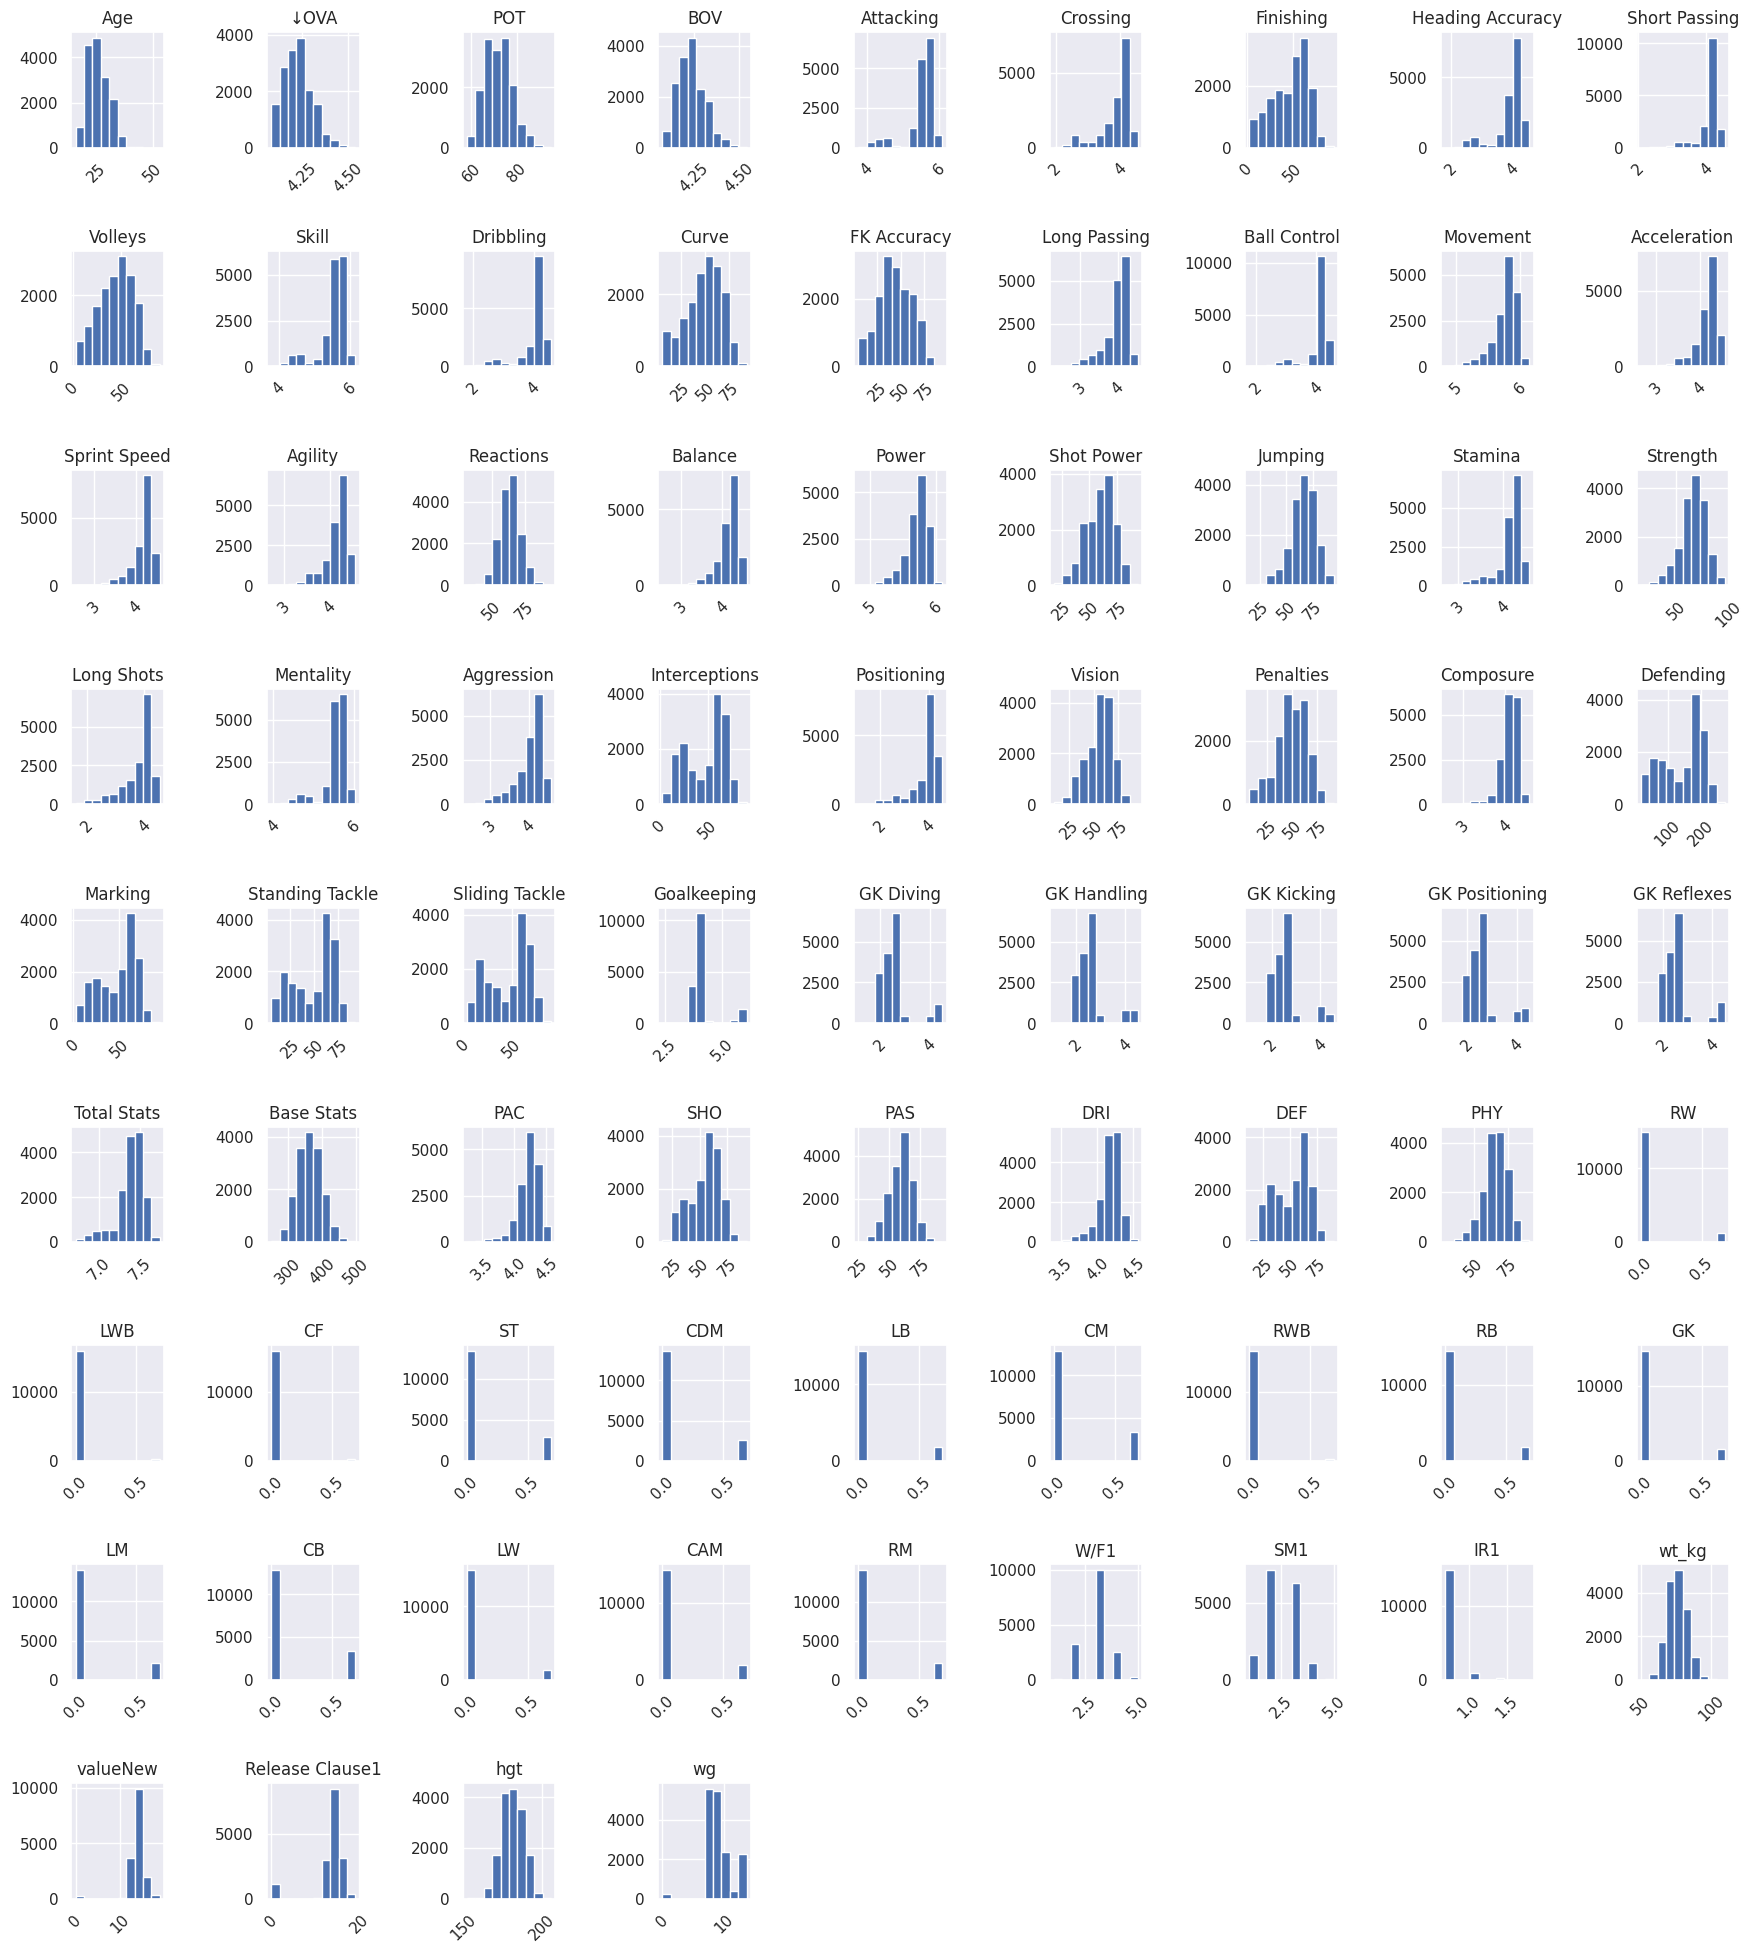

In [144]:
#check the distribution again after transformation
Xx_corrected.hist(figsize=(18,20), xrot=45)
# Adjust spacing between subplots
plt.tight_layout(pad=2.0)
plt.show()

In [145]:
# Initialize StandardScaler or MinMaxScaler
scaler = StandardScaler()  # Use StandardScaler for standardization or MinMaxScaler for rescaling

# Fit and transform the scaler on your input data
Xx_scaled = scaler.fit_transform(Xx_corrected)
Xx_scaled

array([[ 1.57529281,  3.9821168 ,  3.60633705, ...,  1.37049408,
        -1.63962872,  1.84172456],
       [ 2.01995279,  3.84920723,  3.43602411, ...,  1.21709167,
         0.83272969,  1.41962508],
       [ 0.24131288,  3.71486078,  3.60633705, ...,  1.40656838,
         0.97816254,  1.16423008],
       ...,
       [-0.42567708, -1.80581506, -1.33273842, ..., -3.4163864 ,
         1.70532678, -1.01664979],
       [-1.98198699, -1.80581506,  0.540704  , ..., -0.06854965,
        -0.62159879,  1.7905252 ],
       [-1.31499703, -1.80581506,  0.540704  , ...,  0.02835643,
         0.97816254, -0.28990172]])

In [146]:
# Split the data into training and testing sets
Xx_train, Xx_test, y_train, y_test = train_test_split(Xx_scaled, Y, test_size=0.2, random_state=42)

# Initialize the individual models
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the individual models
gradient_boosting.fit(Xx_train, y_train)

# Make predictions using the individual models
y_pred_gb2 = gradient_boosting.predict(Xx_test)

In [147]:
# performance evaluation metrics
# Calculate the Mean Squared Error (MSE) for the ensemble predictions
mse_gb = mean_squared_error(y_test, y_pred_gb2)
print("gb Mean Squared Error:", mse_gb)
# Root Mean Squared Error (RMSE)
rmse_gb = np.sqrt(mse_gb)
print("gb Root Mean Squared Error (RMSE):", rmse_gb)

# Mean Absolute Error (MAE)
mae_gb = mean_absolute_error(y_test, y_pred_gb2)
print("gb Mean Absolute Error (MAE):", mae_gb)

# R-squared (R^2)
r_squared_gb = r2_score(y_test, y_pred_gb2)
print("Ensemble R-squared (R^2):", r_squared_gb)

# Mean Absolute Percentage Error (MAPE)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb2)
print("Ensemble Mean Absolute Percentage Error (MAPE):", mape_gb)

# Explained Variance Score
explained_variance_gb = explained_variance_score(y_test, y_pred_gb2)
print("Ensemble Explained Variance Score:", explained_variance_gb)

gb Mean Squared Error: 2527.1895823352497
gb Root Mean Squared Error (RMSE): 50.27116054295196
gb Mean Absolute Error (MAE): 13.159396952560794
Ensemble R-squared (R^2): 0.534652278565499
Ensemble Mean Absolute Percentage Error (MAPE): 1.3190852885889095
Ensemble Explained Variance Score: 0.5351892730429451


using recursive feature elimination to take out features not contributting to the success of the model

In [148]:
from sklearn.feature_selection import RFE
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)


In [150]:
rfe = RFE(gradient_boosting,n_features_to_select= 38)
fit= rfe.fit(Xx_scaled,Y)
print(fit.support_)
print(fit.ranking_)

[ True  True  True  True False  True  True False False False False  True
 False  True False  True False  True  True False False  True  True  True
  True False  True False False False False False False  True  True False
 False  True  True  True  True False  True  True  True  True False  True
  True False False False  True  True False  True False False False False
  True False False False False False False False False  True False  True
  True  True  True  True]
[ 1  1  1  1  9  1  1  5  3  2 25  1  7  1 11  1 13  1  1 33 14  1  1  1
  1  4  1 21 16 26 23 20 15  1  1  8 17  1  1  1  1  6  1  1  1  1 24  1
  1 22 12 10  1  1 32  1 38 27 34 28  1 29 31 18 30 36 39 37 35  1 19  1
  1  1  1  1]


In [151]:
list(Xx_corrected.columns)

['Age',
 '↓OVA',
 'POT',
 'BOV',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'RW',
 'LWB',
 'CF',
 'ST',
 'CDM',
 'LB',
 'CM',
 'RWB',
 'RB',
 'GK',
 'LM',
 'CB',
 'LW',
 'CAM',
 'RM',
 'W/F1',
 'SM1',
 'IR1',
 'wt_kg',
 'valueNew',
 'Release Clause1',
 'hgt',
 'wg']

In [154]:
# extracted columns from RFE result
Refcol=['Age',
 '↓OVA',
 'POT',
 'BOV',
 'Crossing',
 'Finishing',
 'Dribbling',
 'FK Accuracy',
 'Ball Control',
 'Acceleration',
 'Sprint Speed',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Strength',
 'Penalties',
 'Composure',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'PAS',
 'DRI',
 'LWB',
 'CF',
 'RWB',
 'SM1',
 'wt_kg',
 'valueNew',
 'Release Clause1',
 'hgt',
 'wg']

In [157]:
# Convert 'Xx_scaled' to a DataFrame
Xx_scaled_df = pd.DataFrame(data=Xx_scaled, columns=column_names)
Xx_scaled_df

,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,RW,LWB,CF,ST,CDM,LB,CM,RWB,RB,GK,LM,CB,LW,CAM,RM,W/F1,SM1,IR1,wt_kg,valueNew,Release Clause1,hgt,wg
0,1.575293,3.982117,3.606337,3.944923,1.405472,1.214959,2.450922,0.745954,1.455649,2.480240,1.602040,1.204518,2.422299,2.888276,1.680759,1.331494,1.876119,1.349696,0.883271,1.444794,3.902610,1.671720,1.523905,2.058535,0.210614,0.494212,0.229128,1.409777,1.035661,-0.589495,-0.399145,1.219105,2.943578,1.659088,2.322052,-0.877374,-0.820692,-0.667471,-1.093032,-0.253213,-1.041169,-0.167763,0.319089,0.202140,-0.630549,1.906882,2.853754,1.337750,2.723835,3.414854,2.574998,-0.829882,-0.110631,3.409232,-0.144718,6.826720,2.157343,-0.432701,-0.358861,-0.513480,-0.142709,-0.357438,-0.335463,-0.396362,-0.513672,-0.293073,-0.367445,-0.390411,1.523372,2.023108,7.654940,-0.477250,2.238270,1.370494,-1.639629,1.841725
1,2.019953,3.849207,3.436024,3.807279,1.450805,1.190428,2.450922,1.285205,1.111934,2.366834,1.280490,1.030146,1.760855,1.848941,1.175695,1.221638,1.633068,1.183030,1.373103,1.270700,4.030746,0.505714,2.304027,2.681688,2.488141,1.007518,0.978207,1.390131,1.091465,0.408919,-0.934036,1.256452,1.976765,2.240450,2.271986,-0.991762,-1.020823,-0.807766,-1.093032,-0.130846,-0.823553,-0.167763,0.319089,0.202140,-0.164752,1.880280,2.797623,1.599808,2.797302,2.336328,2.153705,-1.014289,1.247566,-0.293321,-0.144718,-0.146483,2.157343,-0.432701,-0.358861,-0.513480,-0.142709,-0.357438,-0.335463,-0.396362,-0.513672,3.412114,-0.367445,-0.390411,1.523372,3.312005,7.654940,1.080567,1.993447,1.217092,0.832730,1.419625
2,0.241313,3.714861,3.606337,3.668147,-2.282006,-2.592424,-1.877538,-2.491755,-1.006990,-1.772491,-2.092519,-2.866888,-1.987327,-1.730991,-0.791994,-1.644300,-0.183915,-1.415830,-0.207549,0.260920,3.133796,-0.972223,-0.672489,-0.044607,1.054143,-1.370214,0.978207,-2.282900,-1.913546,-1.301878,-1.420300,-2.432375,0.712471,-2.475041,0.676489,-1.432973,-1.070855,-1.743069,-1.377982,3.363360,3.084295,3.239647,2.993168,3.180752,3.115545,-0.797424,3.499258,1.470268,2.723835,2.012770,2.225836,0.030687,2.718947,-0.293321,-0.144718,-0.146483,-0.463533,-0.432701,-0.358861,-0.513480,-0.142709,-0.357438,2.980959,-0.396362,-0.513672,-0.293073,-0.367445,-0.390411,0.033859,-1.843585,4.725764,1.647045,2.311218,1.406568,0.978163,1.164230
3,0.685973,3.714861,3.265711,3.668147,1.276318,1.423712,1.781041,0.230281,1.562783,2.140021,1.440608,1.030146,1.981337,2.253127,1.746558,1.221638,1.206305,0.730752,0.688461,0.848156,3.518203,0.777837,1.805190,2.448006,-0.211150,1.200299,0.645283,1.350202,1.562905,0.933105,0.865142,1.122143,2.869208,2.240450,2.066367,0.675032,0.980484,0.735482,0.284228,-0.190956,0.306068,0.088748,-1.323395,-0.310300,0.084839,2.097542,3.386996,0.700558,2.283030,3.630559,2.080768,0.768318,1.360749,-0.293321,-0.144718,-0.146483,-0.463533,-0.432701,-0.358861,1.947495,-0.142709,-0.357438,-0.335463,-0.396362,-0.513672,-0.293073,2.721493,-0.390411,3.012885,2.023108,6.337806,-0.760490,2.346884,1.409119,-0.039867,1.654493
4,0.463643,3.714861,3.265711,3.668147,1.282338,1.214959,2.038688,0.486203,1.307237,2.423537,1.480524,1.183524,2.146698,2.599572,1.328703,1.304461,1.899830,1.470006,1.288557,1.652063,3.518203,1.130503,1.017649,1.591170,-0.295502,0.886328,-1.352262,1.203274,1.119012,-0.179662,-0.593651,1.102098,2.571727,2.757216,2.170270,-0.828351,-0.670594,-0.901297,-0.855573,-0.101551,-0.459896,-0.471150,0.319089,0.308771,-0.164752,1.756347,2.432773,1.726500,2.209563,2.875591,2.506644,-0.952820,-0.789730,-0.293321,-0.144718,-0.146483,-0.463533,-0.43270

In [158]:
XX=Xx_scaled_df[Refcol] # where XX is the new input data features
XX

,Age,↓OVA,POT,BOV,Crossing,Finishing,Dribbling,FK Accuracy,Ball Control,Acceleration,Sprint Speed,Balance,Power,Shot Power,Jumping,Strength,Penalties,Composure,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAS,DRI,LWB,CF,RWB,SM1,wt_kg,valueNew,Release Clause1,hgt,wg
0,1.575293,3.982117,3.606337,3.944923,1.214959,2.450922,1.204518,2.888276,1.331494,1.349696,0.883271,1.671720,1.523905,2.058535,0.210614,0.229128,1.659088,2.322052,-0.667471,-1.093032,-0.253213,-1.041169,0.319089,0.202140,-0.630549,1.906882,2.853754,3.414854,2.574998,-0.144718,6.826720,-0.142709,2.023108,-0.477250,2.238270,1.370494,-1.639629,1.841725
1,2.019953,3.849207,3.436024,3.807279,1.190428,2.450922,1.030146,1.848941,1.221638,1.183030,1.373103,0.505714,2.304027,2.681688,2.488141,0.978207,2.240450,2.271986,-0.807766,-1.093032,-0.130846,-0.823553,0.319089,0.202140,-0.164752,1.880280,2.797623,2.336328,2.153705,-0.144718,-0.146483,-0.142709,3.312005,1.080567,1.993447,1.217092,0.832730,1.419625
2,0.241313,3.714861,3.606337,3.668147,-2.592424,-1.877538,-2.866888,-1.730991,-1.644300,-1.415830,-0.207549,-0.972223,-0.672489,-0.044607,1.054143,0.978207,-2.475041,0.676489,-1.743069,-1.377982,3.363360,3.084295,2.993168,3.180752,3.115545,-0.797424,3.499258,2.012770,2.225836,-0.144718,-0.146483,-0.142709,-1.843585,1.647045,2.311218,1.406568,0.978163,1.164230
3,0.685973,3.714861,3.265711,3.668147,1.423712,1.781041,1.030146,2.253127,1.221638,0.730752,0.688461,0.777837,1.805190,2.448006,-0.211150,0.645283,2.240450,2.066367,0.735482,0.284228,-0.190956,0.306068,-1.323395,-0.310300,0.084839,2.097542,3.386996,3.630559,2.080768,-0.144718,-0.146483,-0.142709,2.023108,-0.760490,2.346884,1.409119,-0.039867,1.654493
4,0.463643,3.714861,3.265711,3.668147,1.214959,2.038688,1.183524,2.599572,1.304461,1.470006,1.288557,1.130503,1.017649,1.591170,-0.295502,-1.352262,2.757216,2.170270,-0.901297,-0.855573,-0.101551,-0.459896,0.319089,0.308771,-0.164752,1.756347,2.432773,2.875591,2.506644,-0.144718,-0.146483,-0.142709,3.312005,-1.043729,2.358221,1.417697,-0.912464,1.512146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228,0.463643,-1.805815,-2.354616,-1.832879,0.277393,0.286692,0.127473,0.809606,0.121487,0.104405,-0.207549,0.616765,-0.672489,-0.434078,-2.151265,-0.686414,-0.084998,0.159674,0.034006,-0.238181,-0.350979,-0.823553,-0.841646,-0.034292,0.196548,-0.083833,-0.794745,-0.144282,-0.385181,-0.144718,-0.146483,-0.142709,0.734210,0.372468,-0.843491,-0.296909,-0.912464,1.790525
16229,-1.759657,-1.805815,0.370391,-1.620154,-0.794011,-1.104599,-0.641303,-1.095842,-0.852087,-0.315963,-0.022873,-1.583524,-1.058520,-1.213019,-0.042444,0.062666,-1.053934,-1.388622,0.641952,0.711653,-0.384825,-0.631602,-0.467973,-0.034292,0.301045,-1.240977,-2.113817,-2.301334,-2.821376,-0.144718,-0.146483,-0.142709,-0.554687,0.372468,-0.416910,-0.027127,1.996192,-1.016650
16230,-0.425677,-1.805815,-1.332738,-2.049180,-2.312356,-1.465304,-1.711070,-1.211323,-1.481203,-0.252947,-0.335783,-0.370661,-2.025061,-1.446702,-0.632914,-0.603183,-1.312317,-1.076817,-1.556008,-1.377982,2.632583,2.513570,2.386776,2.378593,2.494241,-1.637791,-0.542156,-0.575692,-0.279036,-0.144718,-0.146483,-0.142709,-1.843585,0.372468,-0.733446,-3.416386,1.705327,-1.016650
16231,-1.981987,-1.805815,0.540704,-1.832879,0.159751,0.595867,0.231384,-0.114247,0.121487,0.963706,0.883271,0.153048,-1.808036,-0.278289,-1.898206,-2.517496,0.302577,-0.977199,-0.948062,-0.760590,-0.072740,-0.304569,-0.028621,-0.467772,0.301045,-0.693595,-1.496379,-1.007103,-0.385181,-0.144718,-0.146483,-0.142709,-0.554687,-0.760490,-0.391614,-0.068550,-0.621599,1.790525


In [159]:
# Split the data into training and testing sets
XX_train, XX_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=42)

In [161]:
# Train the individual models
gradient_boosting.fit(XX_train, y_train)

GradientBoostingRegressor(random_state=42)

In [162]:
# Make predictions on the test data
y_pred_rfe = gradient_boosting.predict(XX_test)

In [164]:
# performance evaluation metrics
# Calculate the Mean Squared Error (MSE) for the ensemble predictions
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
print("rfe Mean Squared Error:", mse_rfe)
# Root Mean Squared Error (RMSE)
rmse_rfe = np.sqrt(mse_rfe)
print("rfe Root Mean Squared Error (RMSE):", rmse_rfe)

# Mean Absolute Error (MAE)
mae_rfe = mean_absolute_error(y_test, y_pred_rfe)
print("rfe Mean Absolute Error (MAE):", mae_rfe)

# R-squared (R^2)
r_squared_rfe = r2_score(y_test, y_pred_rfe)
print("rfe R-squared (R^2):", r_squared_rfe)

# Mean Absolute Percentage Error (MAPE)
mape_rfe = mean_absolute_percentage_error(y_test, y_pred_rfe)
print("rfe Mean Absolute Percentage Error (MAPE):", mape_rfe)

# Explained Variance Score
explained_variance_rfe = explained_variance_score(y_test, y_pred_rfe)
print("rfe Explained Variance Score:", explained_variance_rfe)

rfe Mean Squared Error: 2451.7862393963537
rfe Root Mean Squared Error (RMSE): 49.515515138149915
rfe Mean Absolute Error (MAE): 13.272025006346267
rfe R-squared (R^2): 0.5485367825498562
rfe Mean Absolute Percentage Error (MAPE): 1.310129601820281
rfe Explained Variance Score: 0.5488318042461475


After several preprocessing,cleaning and data transformation, The explained variance score obtained is 54.8%. That means the model can only predict correctly the hits of a player to a tune of 54.8%. This means more features need to be collected about a player to be able to predict its hits. More transformations and outlier corrections might be needed to obtain an improved result.  